# Machine Learning Project 1 - Kobe Bryant Shot Classification
### Shih-Tien Wang

Kobe Bryant is an amazing basketball superstar in the NBA. He marked his retirement from the NBA by scoring 60 points in his final game as a Los Angeles Laker on Wednesday, April 12, 2016. Unfortunately, he passed away on January 26, 2020. As his fans, I would like to use my data analytic knowledge to analyze all his shot selection in a long career. R.I.P Black Mamba.

<img src="files/kobepic.png">

## The Dataset Introduction

* Objective: Classified shot made and shot miss
* Data Rows: 30697
* Data Columns : 25
* Target Variable : shot_made_flag
* Features Variable :
'lat',
 'loc_x',
 'loc_y',
 'lon',
 'minutes_remaining',
 'period',
 'playoffs',
 'seconds_remaining',
 'shot_distance',
 'shot_made_flag',
 'action_Alley Oop Dunk Shot',
 'action_Alley Oop Layup shot',
 'action_Cutting Layup Shot',
 'action_Driving Bank shot',
 'action_Driving Dunk Shot',
 'action_Driving Finger Roll Layup Shot',
 'action_Driving Finger Roll Shot',
 'action_Driving Floating Bank Jump Shot',
 'action_Driving Floating Jump Shot',
 'action_Driving Hook Shot',
 'action_Driving Jump shot',
 'action_Driving Layup Shot',
 'action_Driving Reverse Layup Shot',
 'action_Driving Slam Dunk Shot',
 'action_Dunk Shot',
 'action_Fadeaway Bank shot',
 'action_Fadeaway Jump Shot',
 'action_Finger Roll Layup Shot',
 'action_Finger Roll Shot',
 'action_Floating Jump shot',
 'action_Follow Up Dunk Shot',
 'action_Hook Bank Shot',
 'action_Hook Shot',
 'action_Jump Bank Shot',
 'action_Jump Hook Shot',
 'action_Jump Shot',
 'action_Layup Shot',
 'action_Pullup Bank shot',
 'action_Pullup Jump shot',
 'action_Putback Dunk Shot',
 'action_Putback Layup Shot',
 'action_Putback Slam Dunk Shot',
 'action_Reverse Dunk Shot',
 'action_Reverse Layup Shot',
 'action_Reverse Slam Dunk Shot',
 'action_Running Bank shot',
 'action_Running Dunk Shot',
 'action_Running Finger Roll Layup Shot',
 'action_Running Finger Roll Shot',
 'action_Running Hook Shot',
 'action_Running Jump Shot',
 'action_Running Layup Shot',
 'action_Running Pull-Up Jump Shot',
 'action_Running Reverse Layup Shot',
 'action_Running Tip Shot',
 'action_Slam Dunk Shot',
 'action_Step Back Jump shot',
 'action_Tip Layup Shot',
 'action_Tip Shot',
 'action_Turnaround Bank shot',
 'action_Turnaround Fadeaway shot',
 'action_Turnaround Finger Roll Shot',
 'action_Turnaround Hook Shot',
 'action_Turnaround Jump Shot',
 'c_act_Bank Shot',
 'c_act_Dunk',
 'c_act_Hook Shot',
 'c_act_Jump Shot',
 'c_act_Layup',
 'c_act_Tip Shot',
 'season_1996.0',
 'season_1997.0',
 'season_1998.0',
 'season_1999.0',
 'season_2000.0',
 'season_2001.0',
 'season_2002.0',
 'season_2003.0',
 'season_2004.0',
 'season_2005.0',
 'season_2006.0',
 'season_2007.0',
 'season_2008.0',
 'season_2009.0',
 'season_2010.0',
 'season_2011.0',
 'season_2012.0',
 'season_2013.0',
 'season_2014.0',
 'season_2015.0',
 'shot_type_2PT Field Goal',
 'shot_type_3PT Field Goal',
 'shot_zone_area_Back Court(BC)',
 'shot_zone_area_Center(C)',
 'shot_zone_area_Left Side Center(LC)',
 'shot_zone_area_Left Side(L)',
 'shot_zone_area_Right Side Center(RC)',
 'shot_zone_area_Right Side(R)',
 'shot_zone_basic_Above the Break 3',
 'shot_zone_basic_Backcourt',
 'shot_zone_basic_In The Paint (Non-RA)',
 'shot_zone_basic_Left Corner 3',
 'shot_zone_basic_Mid-Range',
 'shot_zone_basic_Restricted Area',
 'shot_zone_basic_Right Corner 3',
 'shot_zone_range_16-24 ft.',
 'shot_zone_range_24+ ft.',
 'shot_zone_range_8-16 ft.',
 'shot_zone_range_Back Court Shot',
 'shot_zone_range_Less Than 8 ft.',
 'opponent_ATL',
 'opponent_BKN',
 'opponent_BOS',
 'opponent_CHA',
 'opponent_CHI',
 'opponent_CLE',
 'opponent_DAL',
 'opponent_DEN',
 'opponent_DET',
 'opponent_GSW',
 'opponent_HOU',
 'opponent_IND',
 'opponent_LAC',
 'opponent_MEM',
 'opponent_MIA',
 'opponent_MIL',
 'opponent_MIN',
 'opponent_NJN',
 'opponent_NOH',
 'opponent_NOP',
 'opponent_NYK',
 'opponent_OKC',
 'opponent_ORL',
 'opponent_PHI',
 'opponent_PHX',
 'opponent_POR',
 'opponent_SAC',
 'opponent_SAS',
 'opponent_SEA',
 'opponent_TOR',
 'opponent_UTA',
 'opponent_VAN',
 'opponent_WAS'

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('kobe_shot_data.csv')
# make a original copy
df_orignal = df.copy()
df.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


In [3]:
df.shape

(30697, 25)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   action_type         30697 non-null  object 
 1   combined_shot_type  30697 non-null  object 
 2   game_event_id       30697 non-null  int64  
 3   game_id             30697 non-null  int64  
 4   lat                 30697 non-null  float64
 5   loc_x               30697 non-null  int64  
 6   loc_y               30697 non-null  int64  
 7   lon                 30697 non-null  float64
 8   minutes_remaining   30697 non-null  int64  
 9   period              30697 non-null  int64  
 10  playoffs            30697 non-null  int64  
 11  season              30697 non-null  object 
 12  seconds_remaining   30697 non-null  int64  
 13  shot_distance       30697 non-null  int64  
 14  shot_made_flag      25697 non-null  float64
 15  shot_type           30697 non-null  object 
 16  shot

In [5]:
df.isna().sum().sum()

5000

In [6]:
df['shot_made_flag'].value_counts()

0.0    14232
1.0    11465
Name: shot_made_flag, dtype: int64

## The problem of Shot_made_flag 

'shot_made_flag' has 5000 nan value. My strategy is to take those 5000 rows as new instances. In other words, I will remove the missing values out of the data frame. Therefore, my data frame rows will become 25697 (30697-5000). Then, using the new dataset to split the train and test dataset and move forward. In the end, I will use the model to predict the result from the new instances which I removed earlier.

In [7]:
# explore the missing value on the column (shot_made_flag)
nan_index = df[df['shot_made_flag'].isnull()].index
nan_index

Int64Index([    0,     7,    16,    19,    32,    33,    34,    35,    36,
               37,
            ...
            30646, 30648, 30655, 30659, 30664, 30668, 30680, 30682, 30686,
            30693],
           dtype='int64', length=5000)

In [8]:
df_NewInstances = df.iloc[nan_index].copy()
df_NewInstances.reset_index(inplace = True)
df_NewInstances.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               5000 non-null   int64  
 1   action_type         5000 non-null   object 
 2   combined_shot_type  5000 non-null   object 
 3   game_event_id       5000 non-null   int64  
 4   game_id             5000 non-null   int64  
 5   lat                 5000 non-null   float64
 6   loc_x               5000 non-null   int64  
 7   loc_y               5000 non-null   int64  
 8   lon                 5000 non-null   float64
 9   minutes_remaining   5000 non-null   int64  
 10  period              5000 non-null   int64  
 11  playoffs            5000 non-null   int64  
 12  season              5000 non-null   object 
 13  seconds_remaining   5000 non-null   int64  
 14  shot_distance       5000 non-null   int64  
 15  shot_made_flag      0 non-null      float64
 16  shot_t

In [9]:
df_NewInstances.head()

,index,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,7,Jump Shot,Jump Shot,254,20000012,34.0163,1,28,-118.2688,8,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,8
2,16,Driving Layup Shot,Layup,100,20000019,34.0443,0,0,-118.2698,0,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-11-01,LAL vs. UTA,UTA,17
3,19,Driving Layup Shot,Layup,249,20000019,34.0443,0,0,-118.2698,10,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-11-01,LAL vs. UTA,UTA,20
4,32,Jump Shot,Jump Shot,4,20000047,33.9683,163,76,-118.1068,11,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-11-04,LAL @ VAN,VAN,33


In [10]:
# drop the rows and reset the index
df = df.drop(nan_index)
df.reset_index()
df.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5
5,Jump Shot,Jump Shot,244,20000012,34.0553,-145,-11,-118.4148,9,3,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,6


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25697 entries, 1 to 30696
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   action_type         25697 non-null  object 
 1   combined_shot_type  25697 non-null  object 
 2   game_event_id       25697 non-null  int64  
 3   game_id             25697 non-null  int64  
 4   lat                 25697 non-null  float64
 5   loc_x               25697 non-null  int64  
 6   loc_y               25697 non-null  int64  
 7   lon                 25697 non-null  float64
 8   minutes_remaining   25697 non-null  int64  
 9   period              25697 non-null  int64  
 10  playoffs            25697 non-null  int64  
 11  season              25697 non-null  object 
 12  seconds_remaining   25697 non-null  int64  
 13  shot_distance       25697 non-null  int64  
 14  shot_made_flag      25697 non-null  float64
 15  shot_type           25697 non-null  object 
 16  shot

In [12]:
df.describe()

,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag,team_id,shot_id
count,25697.000000,2.569700e+04,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,2.569700e+04,25697.000000
mean,249.348679,2.474109e+07,33.953043,7.148422,91.257345,-118.262652,4.886796,2.520800,0.146243,28.311554,13.457096,0.446161,1.610613e+09,15328.166946
std,149.778520,7.738108e+06,0.088152,110.073147,88.152106,0.110073,3.452475,1.151626,0.353356,17.523392,9.388725,0.497103,0.000000e+00,8860.462397
min,2.000000,2.000001e+07,33.253300,-250.000000,-44.000000,-118.519800,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.610613e+09,2.000000
25%,111.000000,2.050006e+07,33.884300,-67.000000,4.000000,-118.336800,2.000000,1.000000,0.000000,13.000000,5.000000,0.000000,1.610613e+09,7646.000000
50%,253.000000,2.090034e+07,33.970300,0.000000,74.000000,-118.269800,5.000000,3.000000,0.000000,28.000000,15.000000,0.000000,1.610613e+09,15336.000000
75%,367.000000,2.960027e+07,34.040300,94.000000,160.000000,-118.175800,8.000000,3.000000,0.000000,43.000000,21.000000,1.000000,1.610613e+09,22976.000000
max,653.000000,4.990009e+07,34.088300,248.000000,791.000000,-118.021800,11.000000,7.000000,1.000000,59.000000,79.000000,1.000000,1.610613e+09,30697.000000


In [13]:
df.describe(include='O')

,action_type,combined_shot_type,season,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_name,game_date,matchup,opponent
count,25697,25697,25697,25697,25697,25697,25697,25697,25697,25697,25697
unique,55,6,20,2,6,7,5,1,1558,74,33
top,Jump Shot,Jump Shot,2005-06,2PT Field Goal,Center(C),Mid-Range,Less Than 8 ft.,Los Angeles Lakers,2016-04-13,LAL @ SAS,SAS
freq,15836,19710,1924,20285,11289,10532,7857,25697,43,853,1638


# The Dataset after subtracting partial rows

Data Rows    : 25697\
Data Columns : 25

Thus, I will use this dataset for further analysis.

# Assign missing values (10%)

In [14]:
mask = np.random.choice([True, False], size = df.shape, p=[.05,.95])
# I will randomly assigne values to all the columns except my target column 'shot_made_flag' and column 'opponent'
target_column = df.shot_made_flag
opponent_column = df.opponent

df = df.mask(mask)
df = df.assign(shot_made_flag=target_column)
df = df.assign(opponent=opponent_column)
df.info()
df.isna().sum().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25697 entries, 1 to 30696
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   action_type         24394 non-null  object 
 1   combined_shot_type  24447 non-null  object 
 2   game_event_id       24447 non-null  float64
 3   game_id             24463 non-null  float64
 4   lat                 24366 non-null  float64
 5   loc_x               24369 non-null  float64
 6   loc_y               24397 non-null  float64
 7   lon                 24367 non-null  float64
 8   minutes_remaining   24410 non-null  float64
 9   period              24372 non-null  float64
 10  playoffs            24368 non-null  float64
 11  season              24397 non-null  object 
 12  seconds_remaining   24394 non-null  float64
 13  shot_distance       24420 non-null  float64
 14  shot_made_flag      25697 non-null  float64
 15  shot_type           24396 non-null  object 
 16  shot

29721

In [15]:
df.describe()

,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag,team_id,shot_id
count,24447.000000,2.446300e+04,24366.000000,24369.000000,24397.000000,24367.000000,24410.000000,24372.000000,24368.000000,24394.000000,24420.000000,25697.000000,2.442400e+04,24472.000000
mean,249.388923,2.475068e+07,33.952908,7.141081,91.452392,-118.262516,4.885907,2.522239,0.146175,28.304665,13.434480,0.446161,1.610613e+09,15322.037635
std,149.713912,7.753465e+06,0.088348,110.049418,88.286061,0.109992,3.451882,1.151075,0.353289,17.524554,9.386108,0.497103,0.000000e+00,8860.366280
min,2.000000,2.000001e+07,33.253300,-250.000000,-44.000000,-118.519800,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.610613e+09,2.000000
25%,112.000000,2.050005e+07,33.884300,-67.000000,4.000000,-118.336800,2.000000,1.000000,0.000000,13.000000,5.000000,0.000000,1.610613e+09,7621.750000
50%,253.000000,2.090034e+07,33.970300,0.000000,74.000000,-118.269800,5.000000,3.000000,0.000000,28.000000,15.000000,0.000000,1.610613e+09,15335.500000
75%,367.000000,2.960036e+07,34.040300,94.000000,160.000000,-118.175800,8.000000,3.000000,0.000000,43.000000,21.000000,1.000000,1.610613e+09,22963.250000
max,653.000000,4.990009e+07,34.088300,248.000000,791.000000,-118.021800,11.000000,7.000000,1.000000,59.000000,79.000000,1.000000,1.610613e+09,30697.000000


In [16]:
df.describe(include='O')

,action_type,combined_shot_type,season,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_name,game_date,matchup,opponent
count,24394,24447,24397,24396,24370,24358,24434,24475,24339,24431,25697
unique,54,6,20,2,6,7,5,1,1558,74,33
top,Jump Shot,Jump Shot,2005-06,2PT Field Goal,Center(C),Mid-Range,Less Than 8 ft.,Los Angeles Lakers,2007-03-30,LAL @ SAS,SAS
freq,15031,18756,1830,19240,10670,9980,7442,24475,39,804,1638


# The Data Exploration

Let us using some graphic to have a big picture of this dataset first!

Text(0.5, 1.0, 'lat and lon')

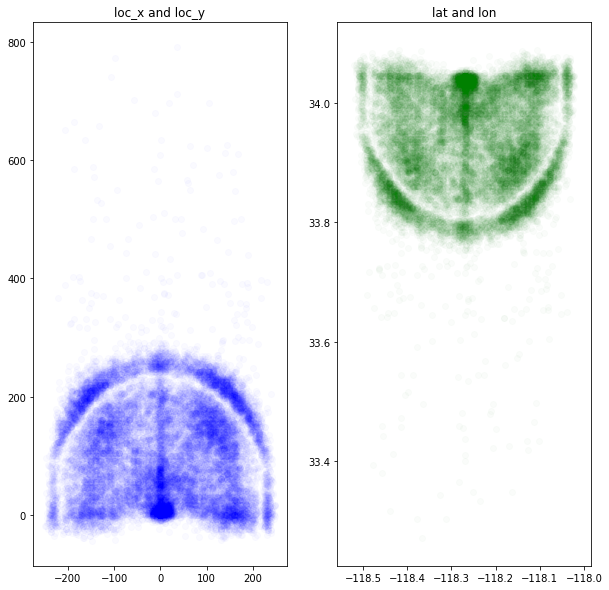

In [17]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

alpha = 0.02
plt.figure(figsize=(10,10))

# loc_x and loc_y
plt.subplot(121)
plt.scatter(df.loc_x, df.loc_y, color='blue', alpha=alpha)
plt.title('loc_x and loc_y')

# lat and lon
plt.subplot(122)
plt.scatter(df.lon, df.lat, color='green', alpha=alpha)
plt.title('lat and lon')

Text(0.5, 1.0, 'shot_zone_range')

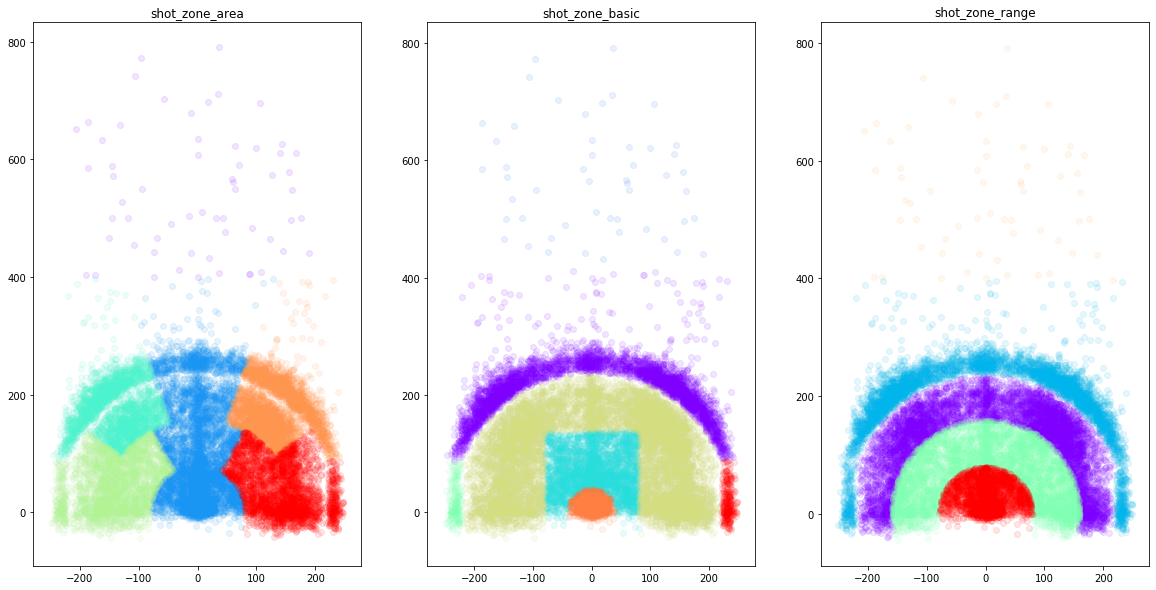

In [18]:
plt.figure(figsize=(20,10))

def scatter_plot_by_category(feat):
    alpha = 0.1
    gs = df.groupby(feat)
    cs = cm.rainbow(np.linspace(0, 1, len(gs)))
    for g, c in zip(gs, cs):
        plt.scatter(g[1].loc_x, g[1].loc_y, color=c, alpha=alpha)

# shot_zone_area
plt.subplot(131)
scatter_plot_by_category('shot_zone_area')
plt.title('shot_zone_area')

# shot_zone_basic
plt.subplot(132)
scatter_plot_by_category('shot_zone_basic')
plt.title('shot_zone_basic')

# shot_zone_range
plt.subplot(133)
scatter_plot_by_category('shot_zone_range')
plt.title('shot_zone_range')

/usr/local/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


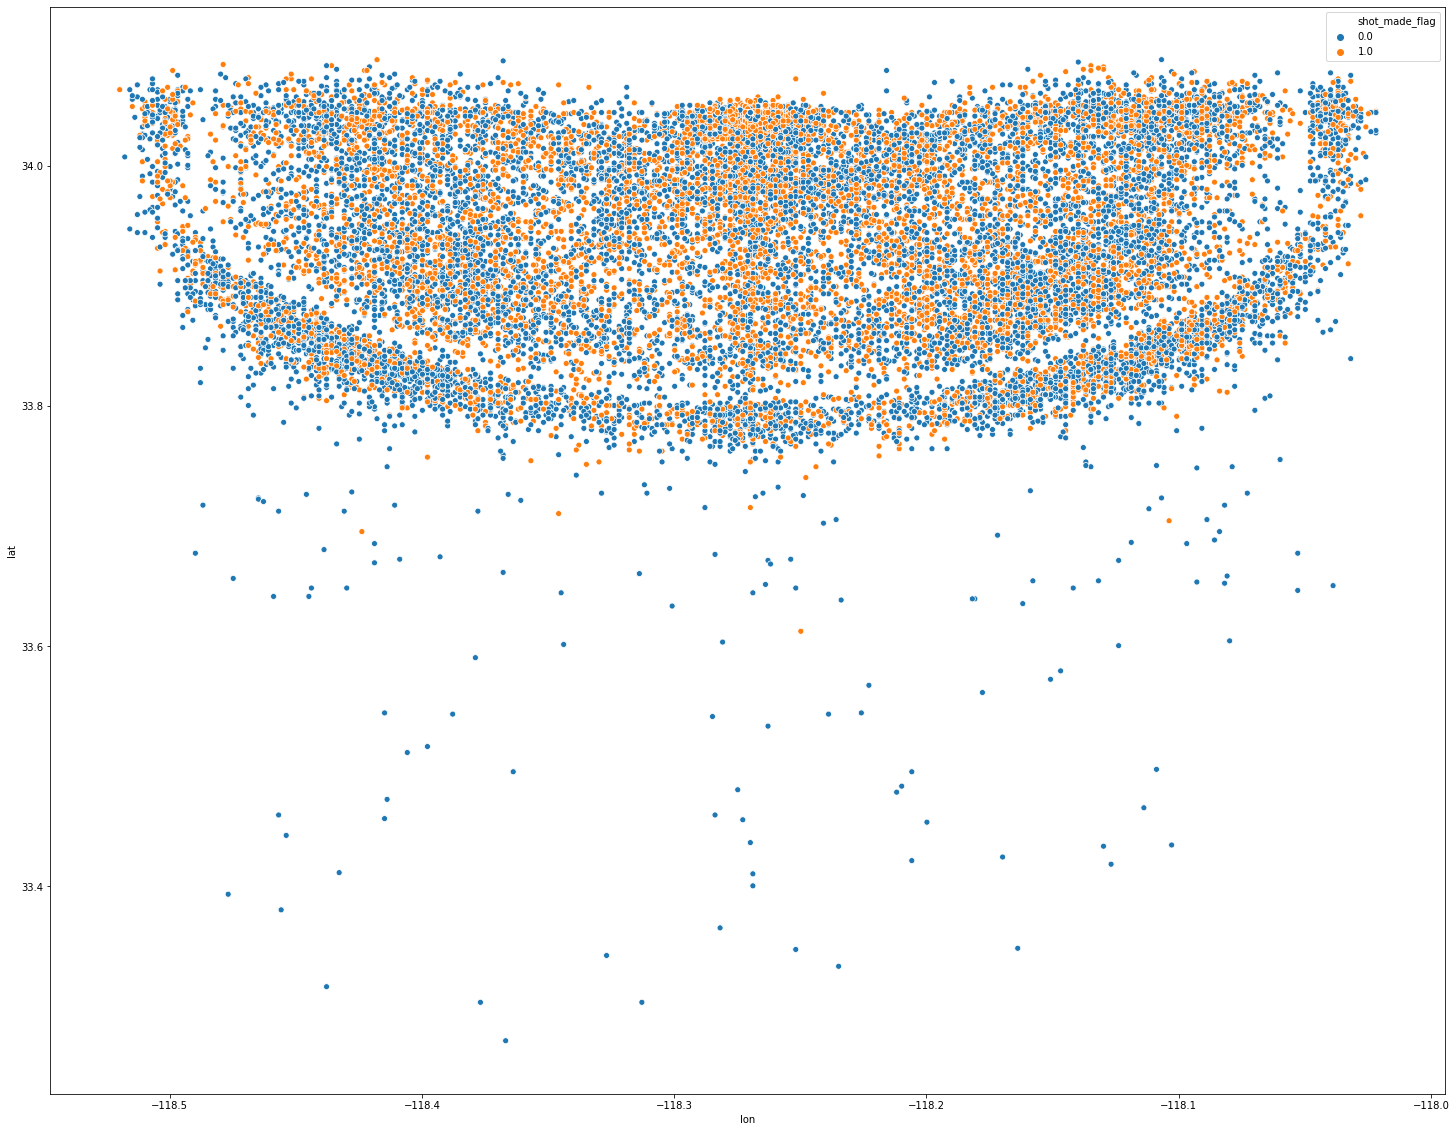

In [19]:
import seaborn as sns
f, ax = plt.subplots(1, 1, figsize=(25,20))
sns.scatterplot(x=df['lon'], y=df['lat'], data=df, hue='shot_made_flag', ax=ax)
plt.show()

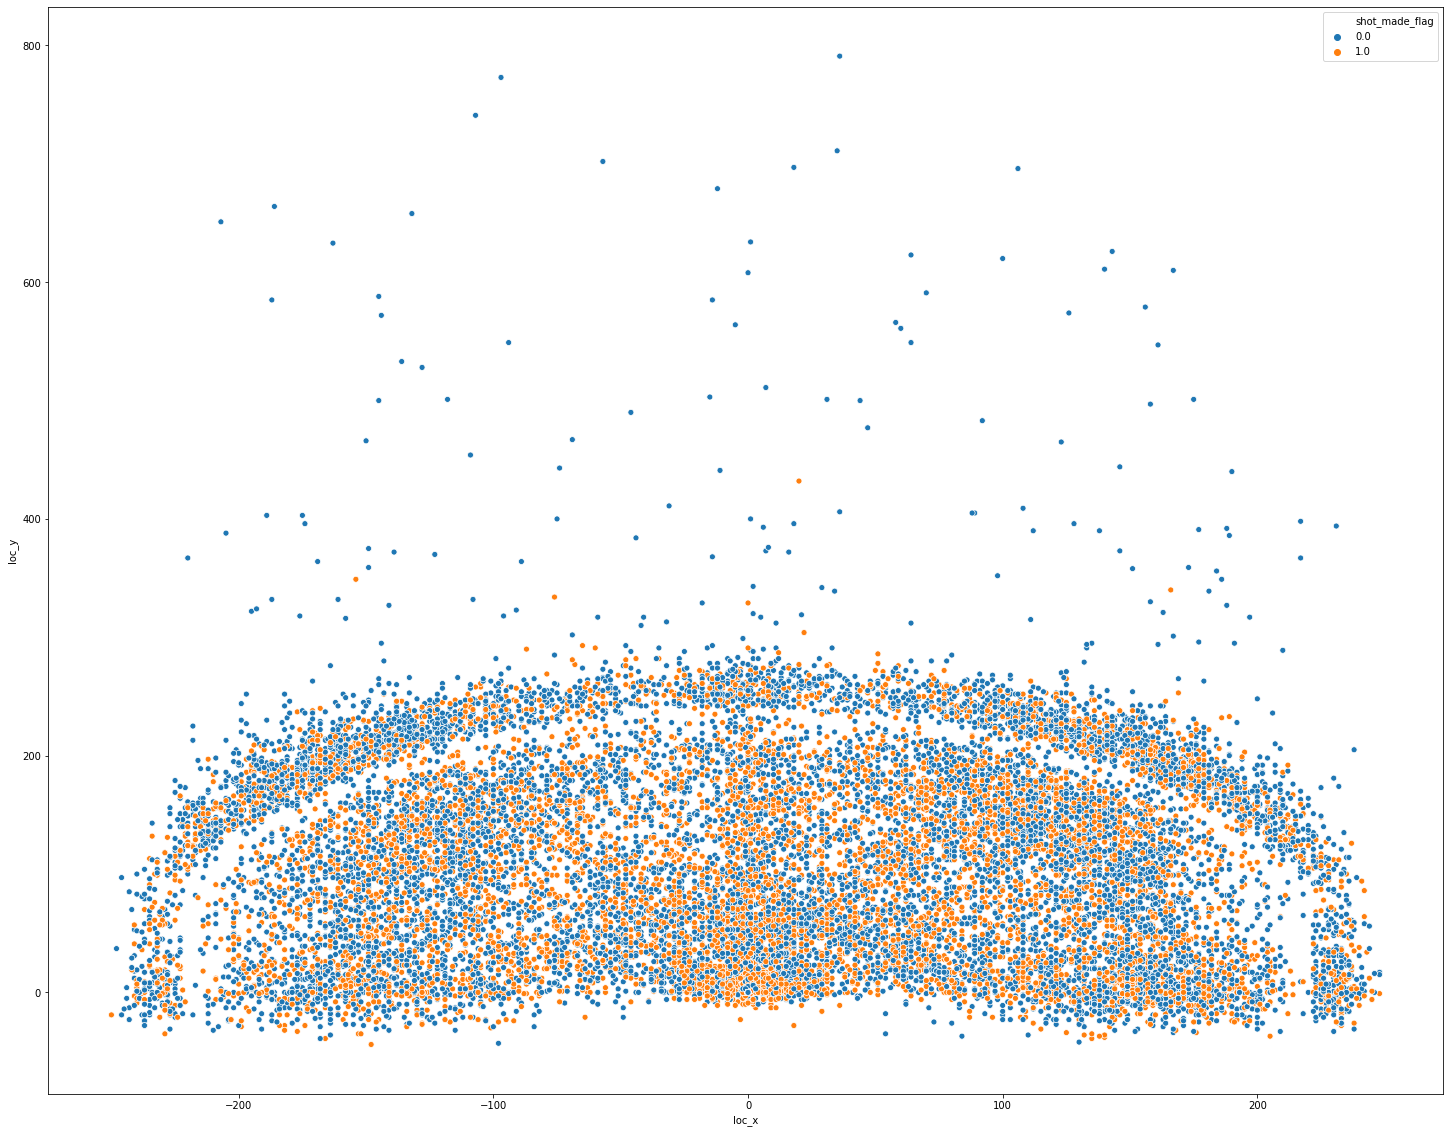

In [20]:
import seaborn as sns
f, ax = plt.subplots(1, 1, figsize=(25,20))
sns.scatterplot(x=df['loc_x'], y=df['loc_y'], data=df, hue='shot_made_flag', ax=ax)
plt.show()

# The Columns Exploration

Let us explore the columns and determine which features should include to generate our model.

Columns Overview:
1.  'action_type'
2.  'combined_shot_type'
3.  'game_event_id'
4.  'game_id'
5.  'lat'
6.  'loc_x'
7.  'loc_y'
8.  'lon'
9.  'minutes_remaining'
10. 'period'
11. 'playoffs'
12. 'season'
13. 'seconds_remaining'
14. 'shot_distance'
15. 'shot_made_flag'
16. 'shot_type'
17. 'shot_zone_area'
18. 'shot_zone_basic'
19. 'shot_zone_range'
20. 'team_id'
21. 'team_name'
22. 'game_date'
23. 'matchup'
24. 'opponent'
25. 'shot_id'

## 1. action_type

Since action type is one of the features I interested. Then, I will transfer this column into one hot vector type. Additionaly, the columns have 1268 missing values. I will use the biggest group 'Jump Shot' to replace those missing values. 

The reason that I replace the NaN values by 'Jump Shot' is because 'Jump Shot' is the biggest group in the columns. Therefore, it won't bias the result. However, if I replace the missing values by 'Step Back Jump shot' which only have 99 counts in the column, it will raise 'Step Back Jump shot' to the third largest group in the column. Obviously, it will cause a problem.

In [21]:
df['action_type'].nunique()

54

In [22]:
df['action_type'].value_counts()

Jump Shot                          15031
Layup Shot                          2054
Driving Layup Shot                  1545
Turnaround Jump Shot                 858
Fadeaway Jump Shot                   831
Running Jump Shot                    724
Pullup Jump shot                     383
Turnaround Fadeaway shot             340
Slam Dunk Shot                       324
Reverse Layup Shot                   316
Jump Bank Shot                       271
Driving Dunk Shot                    244
Dunk Shot                            206
Tip Shot                             145
Step Back Jump shot                  100
Alley Oop Dunk Shot                   91
Floating Jump shot                    89
Driving Reverse Layup Shot            76
Hook Shot                             72
Driving Finger Roll Shot              65
Alley Oop Layup shot                  60
Reverse Dunk Shot                     57
Turnaround Bank shot                  56
Driving Finger Roll Layup Shot        56
Running Layup Sh

In [23]:
df['action_type'].isnull().sum().sum() # check missing values

1303

In [24]:
# Replace the missing values by the majority 'Jump Shot'
df['action_type'] = df['action_type'].replace(np.nan, 'Jump Shot')

In [25]:
df['action_type'].value_counts()

Jump Shot                          16334
Layup Shot                          2054
Driving Layup Shot                  1545
Turnaround Jump Shot                 858
Fadeaway Jump Shot                   831
Running Jump Shot                    724
Pullup Jump shot                     383
Turnaround Fadeaway shot             340
Slam Dunk Shot                       324
Reverse Layup Shot                   316
Jump Bank Shot                       271
Driving Dunk Shot                    244
Dunk Shot                            206
Tip Shot                             145
Step Back Jump shot                  100
Alley Oop Dunk Shot                   91
Floating Jump shot                    89
Driving Reverse Layup Shot            76
Hook Shot                             72
Driving Finger Roll Shot              65
Alley Oop Layup shot                  60
Reverse Dunk Shot                     57
Turnaround Bank shot                  56
Driving Finger Roll Layup Shot        56
Running Layup Sh

In [26]:
df['action_type'].isnull().sum().sum() # check missing values

0

In [27]:
# Transfer to one hot vector type
action=pd.get_dummies(df['action_type'],columns='action_type',prefix='action')
df=pd.concat([df, action], axis=1)
df.drop(['action_type'],axis=1,inplace= True)
df.columns

Index(['combined_shot_type', 'game_event_id', 'game_id', 'lat', 'loc_x',
       'loc_y', 'lon', 'minutes_remaining', 'period', 'playoffs', 'season',
       'seconds_remaining', 'shot_distance', 'shot_made_flag', 'shot_type',
       'shot_zone_area', 'shot_zone_basic', 'shot_zone_range', 'team_id',
       'team_name', 'game_date', 'matchup', 'opponent', 'shot_id',
       'action_Alley Oop Dunk Shot', 'action_Alley Oop Layup shot',
       'action_Cutting Layup Shot', 'action_Driving Bank shot',
       'action_Driving Dunk Shot', 'action_Driving Finger Roll Layup Shot',
       'action_Driving Finger Roll Shot',
       'action_Driving Floating Bank Jump Shot',
       'action_Driving Floating Jump Shot', 'action_Driving Hook Shot',
       'action_Driving Jump shot', 'action_Driving Layup Shot',
       'action_Driving Reverse Layup Shot', 'action_Driving Slam Dunk Shot',
       'action_Dunk Shot', 'action_Fadeaway Bank shot',
       'action_Fadeaway Jump Shot', 'action_Finger Roll Layup Shot

## 2. combined_shot_type

I will say combined shot equal to the finishing action. That's the actual action that shot the ball. I will also use the one hot vector to transfer this column. Also, using the majority group to replace missing values.

In [28]:
df['combined_shot_type'].unique()

array([nan, 'Jump Shot', 'Dunk', 'Layup', 'Tip Shot', 'Hook Shot',
       'Bank Shot'], dtype=object)

In [29]:
df['combined_shot_type'].value_counts(dropna=False)

Jump Shot    18756
Layup         4302
NaN           1250
Dunk          1007
Tip Shot       145
Hook Shot      122
Bank Shot      115
Name: combined_shot_type, dtype: int64

In [30]:
# There are 1296 rows missing, I will use Jump shot to replace it
df['combined_shot_type'] = df['combined_shot_type'].replace(np.nan, 'Jump Shot')

In [31]:
df['combined_shot_type'].isnull().sum().sum() # check missing values

0

In [32]:
# Transfer to one hot vector type
c_act=pd.get_dummies(df['combined_shot_type'],columns='combined_shot_type',prefix='c_act')
df=pd.concat([df, c_act], axis=1)
df.drop(['combined_shot_type'],axis=1,inplace= True)
df.columns

Index(['game_event_id', 'game_id', 'lat', 'loc_x', 'loc_y', 'lon',
       'minutes_remaining', 'period', 'playoffs', 'season',
       'seconds_remaining', 'shot_distance', 'shot_made_flag', 'shot_type',
       'shot_zone_area', 'shot_zone_basic', 'shot_zone_range', 'team_id',
       'team_name', 'game_date', 'matchup', 'opponent', 'shot_id',
       'action_Alley Oop Dunk Shot', 'action_Alley Oop Layup shot',
       'action_Cutting Layup Shot', 'action_Driving Bank shot',
       'action_Driving Dunk Shot', 'action_Driving Finger Roll Layup Shot',
       'action_Driving Finger Roll Shot',
       'action_Driving Floating Bank Jump Shot',
       'action_Driving Floating Jump Shot', 'action_Driving Hook Shot',
       'action_Driving Jump shot', 'action_Driving Layup Shot',
       'action_Driving Reverse Layup Shot', 'action_Driving Slam Dunk Shot',
       'action_Dunk Shot', 'action_Fadeaway Bank shot',
       'action_Fadeaway Jump Shot', 'action_Finger Roll Layup Shot',
       'action_Fing

## 3. game_event_id
I will drop this columns since it is just a label for each game event.

In [33]:
df['game_event_id'].nunique()

618

In [34]:
df['game_event_id'].value_counts(dropna=False)

NaN      1250
2.0        98
12.0       77
4.0        77
17.0       77
         ... 
573.0       1
600.0       1
593.0       1
607.0       1
616.0       1
Name: game_event_id, Length: 619, dtype: int64

In [35]:
df.drop(['game_event_id'],axis=1,inplace= True)
df.columns

Index(['game_id', 'lat', 'loc_x', 'loc_y', 'lon', 'minutes_remaining',
       'period', 'playoffs', 'season', 'seconds_remaining', 'shot_distance',
       'shot_made_flag', 'shot_type', 'shot_zone_area', 'shot_zone_basic',
       'shot_zone_range', 'team_id', 'team_name', 'game_date', 'matchup',
       'opponent', 'shot_id', 'action_Alley Oop Dunk Shot',
       'action_Alley Oop Layup shot', 'action_Cutting Layup Shot',
       'action_Driving Bank shot', 'action_Driving Dunk Shot',
       'action_Driving Finger Roll Layup Shot',
       'action_Driving Finger Roll Shot',
       'action_Driving Floating Bank Jump Shot',
       'action_Driving Floating Jump Shot', 'action_Driving Hook Shot',
       'action_Driving Jump shot', 'action_Driving Layup Shot',
       'action_Driving Reverse Layup Shot', 'action_Driving Slam Dunk Shot',
       'action_Dunk Shot', 'action_Fadeaway Bank shot',
       'action_Fadeaway Jump Shot', 'action_Finger Roll Layup Shot',
       'action_Finger Roll Shot', 'a

## 4. game_id

I will drop this columns since it is just a label for each game.

In [36]:
df['game_id'].nunique()

1557

In [37]:
df['game_id'].value_counts(dropna=False)

NaN           1234
20601081.0      41
20200069.0      38
20700553.0      37
20500591.0      36
              ... 
29600961.0       1
29600027.0       1
49600013.0       1
29600844.0       1
29600284.0       1
Name: game_id, Length: 1558, dtype: int64

In [38]:
df.drop(['game_id'],axis=1,inplace= True)
df.columns

Index(['lat', 'loc_x', 'loc_y', 'lon', 'minutes_remaining', 'period',
       'playoffs', 'season', 'seconds_remaining', 'shot_distance',
       'shot_made_flag', 'shot_type', 'shot_zone_area', 'shot_zone_basic',
       'shot_zone_range', 'team_id', 'team_name', 'game_date', 'matchup',
       'opponent', 'shot_id', 'action_Alley Oop Dunk Shot',
       'action_Alley Oop Layup shot', 'action_Cutting Layup Shot',
       'action_Driving Bank shot', 'action_Driving Dunk Shot',
       'action_Driving Finger Roll Layup Shot',
       'action_Driving Finger Roll Shot',
       'action_Driving Floating Bank Jump Shot',
       'action_Driving Floating Jump Shot', 'action_Driving Hook Shot',
       'action_Driving Jump shot', 'action_Driving Layup Shot',
       'action_Driving Reverse Layup Shot', 'action_Driving Slam Dunk Shot',
       'action_Dunk Shot', 'action_Fadeaway Bank shot',
       'action_Fadeaway Jump Shot', 'action_Finger Roll Layup Shot',
       'action_Finger Roll Shot', 'action_Float

## 5. lat & loc_y

Since they have really high correlation, I will deal with them simultaneously.

'lat' is the geographic latitude coordinates for the half basketball court. The other half will be recorded by loc_y.

The method I want to handle missing values is finding the correlation between lat and other columns. Then, using the highest correlated column to assign values.

In [39]:
# The function that return the 5 largest correlation betweeen target column and other columnes in the dataframe

def find_corr(t_col,df):
    matrix = df.corr()
    i = df.columns.get_loc(t_col)
    n = matrix.columns.tolist()
    m = matrix.iloc[i].tolist()
    abs_m =  [abs(i) for i in m] 
    df_cor = pd.DataFrame(
        {'Columns': n,
         'Correlation': m,
         'Abs_Correlation': abs_m
        })
    return df_cor.nlargest(5,'Abs_Correlation')

### lat histogram

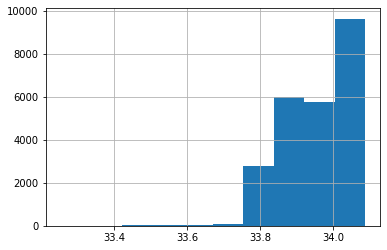

In [40]:
df['lat'].hist()

### loc_y histogram

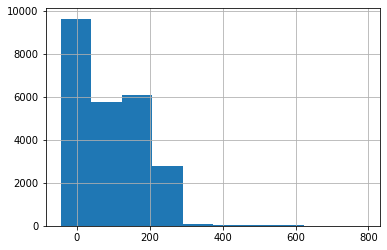

In [41]:
df['loc_y'].hist()

In [42]:
df['lat'].value_counts(dropna=False)

34.0443    4452
NaN        1331
34.0373     189
34.0323     176
34.0413     171
           ... 
34.0873       1
33.6923       1
34.0863       1
33.4343       1
33.4183       1
Name: lat, Length: 444, dtype: int64

In [43]:
# Find the highest correlated value to replace missing values in 'lat' -> loc_y has highest correlation 
find_corr('lat',df)

,Columns,Correlation,Abs_Correlation
0,lat,1.000000,1.000000
2,loc_y,-1.000000,1.000000
8,shot_distance,-0.818175,0.818175
69,c_act_Jump Shot,-0.526012,0.526012
37,action_Jump Shot,-0.503769,0.503769


In [44]:
# use the highest correlated column to impute the missing value
# since the correlation between lat and loc_y is -1, I will impute then simultaneously
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=1000, random_state=0)

imput_lat = df[['lat','loc_y']]
null_data_index = df[df['lat'].isna()].index
null_data = df[df['lat'].isna()]
imp.fit(imput_lat)
df[['lat','loc_y']]= imp.transform(df[['lat','loc_y']]) 

In [45]:
# lat no missing value remain
df['lat'].value_counts(dropna=False)

34.044300    4452
34.044301     212
34.037300     189
34.032300     176
34.041300     171
             ... 
33.710300       1
33.809300       1
33.943301       1
33.661300       1
33.478300       1
Name: lat, Length: 710, dtype: int64

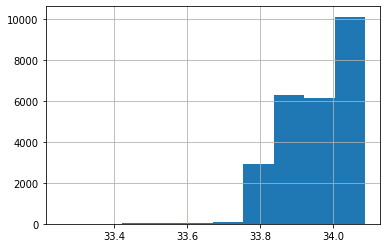

In [46]:
df['lat'].hist()

In [47]:
# loc_y don't have missing valie either
df['loc_y'].value_counts(dropna=False)

 0.000000      4441
 0.000029       223
 7.000000       185
 17.000000      170
 12.000000      169
               ... 
 202.000023       1
 432.000000       1
 528.000000       1
 291.000021       1
-12.999970        1
Name: loc_y, Length: 714, dtype: int64

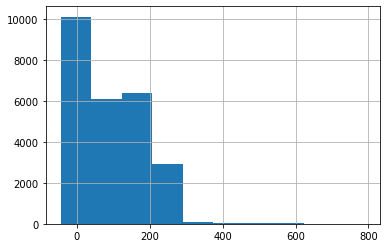

In [48]:
df['loc_y'].hist()

In [49]:
df.columns[df.isnull().any()] # check missing value columns

Index(['loc_x', 'lon', 'minutes_remaining', 'period', 'playoffs', 'season',
       'seconds_remaining', 'shot_distance', 'shot_type', 'shot_zone_area',
       'shot_zone_basic', 'shot_zone_range', 'team_id', 'team_name',
       'game_date', 'matchup', 'shot_id'],
      dtype='object')

## 6. loc_x & lon

Since they have really high correlation, I will deal with them simultaneously.

'loc_x' is the geographic longtitude coordinates for the half basketball court. The other half will be recorded by loc_x.

The method I want to handle missing values is finding the correlation between lat and other columns. Then, using the highest correlated column to assign values.

### loc_x histogram

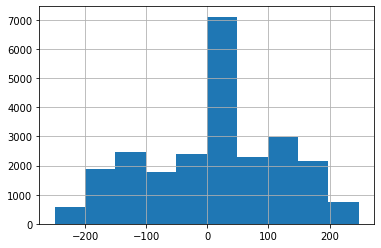

In [50]:
df['loc_x'].hist()

In [51]:
df['loc_x'].value_counts(dropna=False) # 1249 missing values

 0.0      4334
 NaN      1328
 1.0       206
 108.0     123
 138.0     118
          ... 
-246.0       2
-248.0       1
-250.0       1
 243.0       1
-208.0       1
Name: loc_x, Length: 487, dtype: int64

### lon histogram

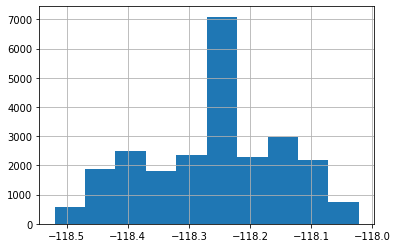

In [52]:
df['lon'].hist()

In [53]:
df['lon'].value_counts(dropna=False) # 1298 missing values

-118.2698    4328
 NaN         1330
-118.2688     211
-118.1108     120
-118.1618     120
             ... 
-118.5198       1
-118.0268       1
-118.5178       1
-118.2868       1
-118.4778       1
Name: lon, Length: 487, dtype: int64

### Find a correlation

In [54]:
# Find the highest correlated value to replace missing values in 'lat' -> loc_y has highest correlation 
find_corr('loc_x',df)

,Columns,Correlation,Abs_Correlation
3,lon,1.000000,1.000000
1,loc_x,1.000000,1.000000
35,action_Jump Bank Shot,-0.045886,0.045886
69,c_act_Jump Shot,0.034226,0.034226
37,action_Jump Shot,0.032804,0.032804


In [55]:
# use the highest correlated column to impute the missing value
# since the correlation between lat and loc_y is -1, I will impute then simultaneously
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=1000, random_state=0)

imput_lon = df[['lon','loc_x']]
null_data_index = df[df['lon'].isna()].index
null_data = df[df['lon'].isna()]
imp.fit(imput_lon)
df[['lon','loc_x']]= imp.transform(df[['lon','loc_x']]) 

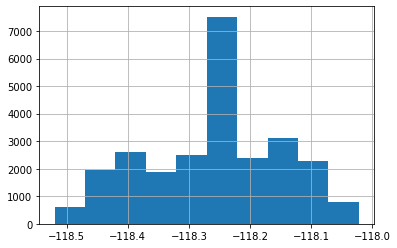

In [56]:
df['lon'].hist()

In [57]:
df['lon'].value_counts(dropna=False) # 1298 missing values

-118.2698    4328
-118.2698     225
-118.2688     211
-118.1618     120
-118.1108     120
             ... 
-118.3368       1
-118.4538       1
-118.0498       1
-118.0518       1
-118.2358       1
Name: lon, Length: 858, dtype: int64

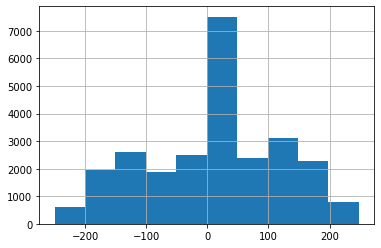

In [58]:
df['loc_x'].hist()

In [59]:
df['loc_x'].value_counts(dropna=False) # 1298 missing values

 0.000000      4334
-0.000013       219
 1.000000       206
 108.000000     123
 138.000000     118
               ... 
-248.000000       1
-175.000013       1
-200.000013       1
 73.999987        1
 21.999987        1
Name: loc_x, Length: 857, dtype: int64

In [60]:
df.columns[df.isnull().any()] # check missing value columns

Index(['minutes_remaining', 'period', 'playoffs', 'season',
       'seconds_remaining', 'shot_distance', 'shot_type', 'shot_zone_area',
       'shot_zone_basic', 'shot_zone_range', 'team_id', 'team_name',
       'game_date', 'matchup', 'shot_id'],
      dtype='object')

## 7. minutes_remaining

In [61]:
df['minutes_remaining'].value_counts(dropna=False) # 1298 missing values

0.0     3093
4.0     2292
2.0     2258
3.0     2255
1.0     2153
5.0     2075
6.0     1887
7.0     1786
9.0     1777
10.0    1702
8.0     1667
11.0    1465
NaN     1287
Name: minutes_remaining, dtype: int64

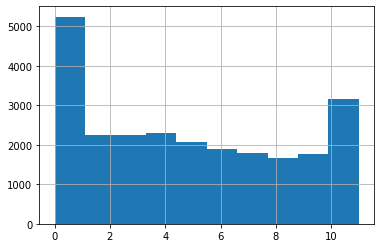

In [62]:
df['minutes_remaining'].hist()

## Fina a correlation

In [63]:
find_corr('minutes_remaining',df)

,Columns,Correlation,Abs_Correlation
4,minutes_remaining,1.000000,1.000000
2,loc_y,-0.076927,0.076927
0,lat,0.076927,0.076927
8,shot_distance,-0.060823,0.060823
5,period,-0.046224,0.046224


In [64]:
# lat and loc_y have the highest correlation, I will use lat to assign values to minutes_remaining
imput_mr = df[['minutes_remaining','lat']]
imp.fit(imput_mr)
df[['minutes_remaining','lat']]= np.round(imp.transform(df[['minutes_remaining','lat']]))

In [65]:
df['minutes_remaining'].value_counts(dropna=False) # 1298 missing values

5.0     3232
0.0     3093
4.0     2421
2.0     2258
3.0     2256
1.0     2153
6.0     1887
7.0     1786
9.0     1777
10.0    1702
8.0     1667
11.0    1465
Name: minutes_remaining, dtype: int64

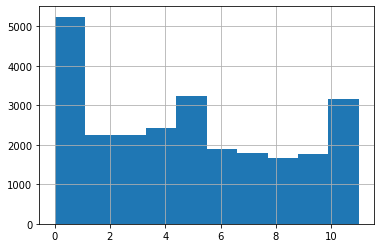

In [66]:
df['minutes_remaining'].hist()

In [67]:
df.columns[df.isnull().any()] # check missing value columns

Index(['period', 'playoffs', 'season', 'seconds_remaining', 'shot_distance',
       'shot_type', 'shot_zone_area', 'shot_zone_basic', 'shot_zone_range',
       'team_id', 'team_name', 'game_date', 'matchup', 'shot_id'],
      dtype='object')

## 8. period

There are four periods (or four quarters) in a game, with the first two quarters comprising the first half (after which there is a decent-sized break), and the last two quarters comprising the second half, and each period is 12 minutes long.

The periods that exceed 4 means Overtime.

In [68]:
df['period'].value_counts(dropna=False) # 1249 missing values

3.0    6656
1.0    6345
4.0    5738
2.0    5332
NaN    1325
5.0     268
6.0      28
7.0       5
Name: period, dtype: int64

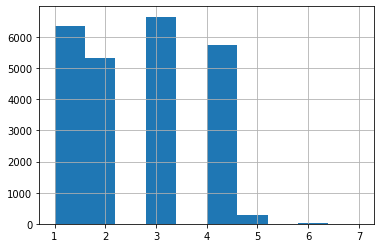

In [69]:
df['period'].hist()

## Find a correlation

In [70]:
find_corr('period',df)

,Columns,Correlation,Abs_Correlation
5,period,1.000000,1.000000
8,shot_distance,0.047438,0.047438
4,minutes_remaining,-0.045217,0.045217
2,loc_y,0.038300,0.038300
9,shot_made_flag,-0.032125,0.032125


Since all the correlations across each column are small, I will assign missing value to the highest frequency column which is 3 period.

In [71]:
df['period'].fillna(3, inplace=True)

In [72]:
df['period'].value_counts(dropna=False) 

3.0    7981
1.0    6345
4.0    5738
2.0    5332
5.0     268
6.0      28
7.0       5
Name: period, dtype: int64

In [73]:
df.columns[df.isnull().any()] # check missing value columns

Index(['playoffs', 'season', 'seconds_remaining', 'shot_distance', 'shot_type',
       'shot_zone_area', 'shot_zone_basic', 'shot_zone_range', 'team_id',
       'team_name', 'game_date', 'matchup', 'shot_id'],
      dtype='object')

## 9. playoffs
0 -> not a playoff\
1 -> is a playoff

I will try to find a correlation first. However, if there don't have a correlation higher than 0.7, I will assign missing value to the most frequent category which is 0.

In [74]:
df.playoffs.value_counts(dropna=False)

0.0    20806
1.0     3562
NaN     1329
Name: playoffs, dtype: int64

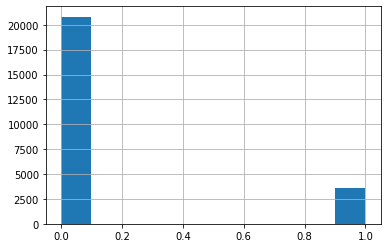

In [75]:
df.playoffs.hist()

# Find a correlation

In [76]:
find_corr('playoffs',df)

,Columns,Correlation,Abs_Correlation
6,playoffs,1.000000,1.000000
11,shot_id,0.611967,0.611967
47,action_Running Bank shot,0.022648,0.022648
52,action_Running Jump Shot,0.020995,0.020995
62,action_Turnaround Fadeaway shot,-0.019753,0.019753


### No features' correlation values higher than 0.7, I will assgin nan to the 0 category.

In [77]:
df['playoffs'].fillna(0, inplace=True)

In [78]:
df.playoffs.value_counts()

0.0    22135
1.0     3562
Name: playoffs, dtype: int64

In [79]:
df.columns[df.isnull().any()]

Index(['season', 'seconds_remaining', 'shot_distance', 'shot_type',
       'shot_zone_area', 'shot_zone_basic', 'shot_zone_range', 'team_id',
       'team_name', 'game_date', 'matchup', 'shot_id'],
      dtype='object')

## 10. season
First, I will clean the column's values. Make them more readble.\ 
Second, since there are no significant correlation value (>0.7). I will filling missing data by random choosing from non missing values in pandas dataframe.

In [80]:
find_corr('season',df)

,Columns,Correlation,Abs_Correlation
7,seconds_remaining,1.000000,1.000000
0,lat,0.061911,0.061911
2,loc_y,-0.058191,0.058191
8,shot_distance,-0.057811,0.057811
9,shot_made_flag,0.031126,0.031126


In [81]:
df.season.value_counts(dropna=False)

2005-06    1830
2002-03    1769
2008-09    1751
2007-08    1723
2009-10    1687
2001-02    1601
2006-07    1510
2000-01    1495
2010-11    1444
2011-12    1342
NaN        1300
2003-04    1298
2012-13    1250
1999-00    1244
2004-05    1072
2015-16     885
1997-98     776
1998-99     733
2014-15     569
1996-97     362
2013-14      56
Name: season, dtype: int64

In [82]:
df['season'] = df['season'].str.split('-').str[0]
#df['season'] = pd.to_numeric(df['season'])
df.season.value_counts(dropna=False)

2005    1830
2002    1769
2008    1751
2007    1723
2009    1687
2001    1601
2006    1510
2000    1495
2010    1444
2011    1342
NaN     1300
2003    1298
2012    1250
1999    1244
2004    1072
2015     885
1997     776
1998     733
2014     569
1996     362
2013      56
Name: season, dtype: int64

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25697 entries, 1 to 30696
Data columns (total 81 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   lat                                     25697 non-null  float64
 1   loc_x                                   25697 non-null  float64
 2   loc_y                                   25697 non-null  float64
 3   lon                                     25697 non-null  float64
 4   minutes_remaining                       25697 non-null  float64
 5   period                                  25697 non-null  float64
 6   playoffs                                25697 non-null  float64
 7   season                                  24397 non-null  object 
 8   seconds_remaining                       24394 non-null  float64
 9   shot_distance                           24420 non-null  float64
 10  shot_made_flag                          25697 non-null  fl

In [84]:
import random 
# 1. replace nan to 0
df['season'] = df['season'].fillna(0)
# 2. chage data type to int
df['season'] = df['season'].astype('int')
# 3. get the unique value in the season
fill_list = df['season'].values.tolist()
fill_list = set(fill_list)
# 4. remove 0 (nan value) and convert set to list (dtype)
fill_list.remove(0)
fill_list = list(fill_list)

# 5. covert 0 to nan since I  want to use fillna to fill the nan value
df['season'].replace(0, np.nan, inplace=True)

# 6. fill the nan value based on random choice
#get mask of NaNs
m = df['season'].isnull()
#count rows with NaNs
l = m.sum()
#create array with size l
s = np.random.choice(fill_list, size=l)
#set NaNs values
df.loc[m, 'season'] = s

# 7. convert int type to str since I am going to convert 'season' to one hot vecotor column
df.season.astype('str')

1        2000.0
2        2000.0
3        2000.0
4        2000.0
5        2000.0
          ...  
30691    1999.0
30692    1999.0
30694    1999.0
30695    2012.0
30696    1999.0
Name: season, Length: 25697, dtype: object

In [85]:
df.season.value_counts(dropna=False)

2005.0    1902
2008.0    1822
2002.0    1820
2007.0    1776
2009.0    1743
2001.0    1671
2006.0    1573
2000.0    1572
2010.0    1500
2011.0    1421
2003.0    1364
2012.0    1317
1999.0    1315
2004.0    1126
2015.0     945
1997.0     842
1998.0     789
2014.0     632
1996.0     439
2013.0     128
Name: season, dtype: int64

In [86]:
# Transfer to one hot vector type
season=pd.get_dummies(df['season'],columns='season',prefix='season')
df=pd.concat([df, season], axis=1)
df.drop(['season'],axis=1,inplace= True)
df.columns

Index(['lat', 'loc_x', 'loc_y', 'lon', 'minutes_remaining', 'period',
       'playoffs', 'seconds_remaining', 'shot_distance', 'shot_made_flag',
       'shot_type', 'shot_zone_area', 'shot_zone_basic', 'shot_zone_range',
       'team_id', 'team_name', 'game_date', 'matchup', 'opponent', 'shot_id',
       'action_Alley Oop Dunk Shot', 'action_Alley Oop Layup shot',
       'action_Cutting Layup Shot', 'action_Driving Bank shot',
       'action_Driving Dunk Shot', 'action_Driving Finger Roll Layup Shot',
       'action_Driving Finger Roll Shot',
       'action_Driving Floating Bank Jump Shot',
       'action_Driving Floating Jump Shot', 'action_Driving Hook Shot',
       'action_Driving Jump shot', 'action_Driving Layup Shot',
       'action_Driving Reverse Layup Shot', 'action_Driving Slam Dunk Shot',
       'action_Dunk Shot', 'action_Fadeaway Bank shot',
       'action_Fadeaway Jump Shot', 'action_Finger Roll Layup Shot',
       'action_Finger Roll Shot', 'action_Floating Jump shot',
 

In [87]:
for colname in df.columns:
    print('Missing value count of {} : {}'.format(colname, df[colname].isnull().sum()))

Missing value count of lat : 0
Missing value count of loc_x : 0
Missing value count of loc_y : 0
Missing value count of lon : 0
Missing value count of minutes_remaining : 0
Missing value count of period : 0
Missing value count of playoffs : 0
Missing value count of seconds_remaining : 1303
Missing value count of shot_distance : 1277
Missing value count of shot_made_flag : 0
Missing value count of shot_type : 1301
Missing value count of shot_zone_area : 1327
Missing value count of shot_zone_basic : 1339
Missing value count of shot_zone_range : 1263
Missing value count of team_id : 1273
Missing value count of team_name : 1222
Missing value count of game_date : 1358
Missing value count of matchup : 1266
Missing value count of opponent : 0
Missing value count of shot_id : 1225
Missing value count of action_Alley Oop Dunk Shot : 0
Missing value count of action_Alley Oop Layup shot : 0
Missing value count of action_Cutting Layup Shot : 0
Missing value count of action_Driving Bank shot : 0
Mi

## 11. seconds_remaining

In [88]:
df.seconds_remaining.value_counts(dropna=False)

NaN     1303
0.0      791
1.0      507
2.0      484
4.0      452
        ... 
50.0     359
49.0     351
53.0     350
58.0     348
55.0     345
Name: seconds_remaining, Length: 61, dtype: int64

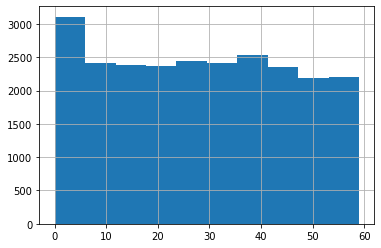

In [89]:
df.seconds_remaining.hist()

There are no significant correlaction we can use. Therefore, I will randomly assign values.

In [90]:
find_corr('seconds_remaining', df)

,Columns,Correlation,Abs_Correlation
7,seconds_remaining,1.000000,1.000000
0,lat,0.061911,0.061911
2,loc_y,-0.058191,0.058191
8,shot_distance,-0.057811,0.057811
9,shot_made_flag,0.031126,0.031126


# Randomly assigned available values into the missing values cells.

In [91]:
# 1. get the unique value in the season
fill_list = df['seconds_remaining'].values.tolist()
fill_list = [x for x in fill_list if str(x) != 'nan']
fill_list = set(fill_list)
# 4. remove 0 (nan value) and convert set to list (dtype)
fill_list = list(fill_list)

# 2. fill the nan value based on random choice
# get mask of NaNs
m = df['seconds_remaining'].isnull()
# count rows with NaNs
l = m.sum()
# create array with size l
s = np.random.choice(fill_list, size=l)
# set NaNs values
df.loc[m, 'seconds_remaining'] = s

df.seconds_remaining.isnull().sum()

0

In [92]:
for colname in df.columns:
    print('Missing value count of {} : {}'.format(colname, df[colname].isnull().sum()))

Missing value count of lat : 0
Missing value count of loc_x : 0
Missing value count of loc_y : 0
Missing value count of lon : 0
Missing value count of minutes_remaining : 0
Missing value count of period : 0
Missing value count of playoffs : 0
Missing value count of seconds_remaining : 0
Missing value count of shot_distance : 1277
Missing value count of shot_made_flag : 0
Missing value count of shot_type : 1301
Missing value count of shot_zone_area : 1327
Missing value count of shot_zone_basic : 1339
Missing value count of shot_zone_range : 1263
Missing value count of team_id : 1273
Missing value count of team_name : 1222
Missing value count of game_date : 1358
Missing value count of matchup : 1266
Missing value count of opponent : 0
Missing value count of shot_id : 1225
Missing value count of action_Alley Oop Dunk Shot : 0
Missing value count of action_Alley Oop Layup shot : 0
Missing value count of action_Cutting Layup Shot : 0
Missing value count of action_Driving Bank shot : 0
Missi

## 12. shot_distance

In [93]:
df.shot_distance.value_counts(dropna=False)

0.0     4406
25.0    1547
NaN     1277
24.0    1198
17.0    1172
        ... 
68.0       1
79.0       1
69.0       1
65.0       1
71.0       1
Name: shot_distance, Length: 74, dtype: int64

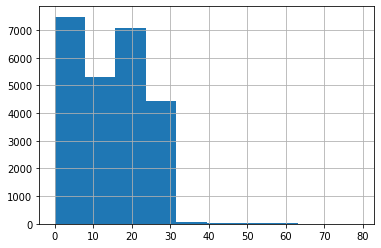

In [94]:
df.shot_distance.hist()

In [95]:
find_corr('shot_distance',df)

,Columns,Correlation,Abs_Correlation
8,shot_distance,1.000000,1.000000
2,loc_y,0.816836,0.816836
69,c_act_Jump Shot,0.728284,0.728284
37,action_Jump Shot,0.648567,0.648567
70,c_act_Layup,-0.623568,0.623568


loc_y highly correlated with shot distance. Therefore, I will use loc_y to predict shot_distance.

## Using loc_y to fill missing values in the shot_distance

In [96]:
imp = IterativeImputer(max_iter=1000, random_state=0)

imput_sd = df[['shot_distance','loc_y']]
null_data_index = df[df['shot_distance'].isna()].index
null_data = df[df['shot_distance'].isna()]
imp.fit(imput_sd)
df[['shot_distance','loc_y']]= imp.transform(df[['shot_distance','loc_y']]) 

In [97]:
df.shot_distance.isnull().sum()

0

In [98]:
df.shot_distance.value_counts()

0.000000     4406
25.000000    1547
24.000000    1198
17.000000    1172
18.000000    1128
             ... 
18.311859       1
33.213263       1
6.809023        1
8.813305        1
17.614717       1
Name: shot_distance, Length: 392, dtype: int64

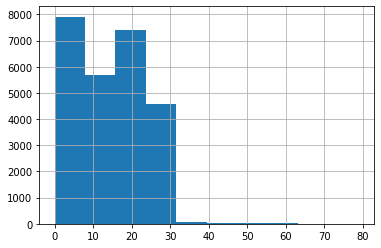

In [99]:
df.shot_distance.hist()

In [100]:
for colname in df.columns:
    print('Missing value count of {} : {}'.format(colname, df[colname].isnull().sum()))

Missing value count of lat : 0
Missing value count of loc_x : 0
Missing value count of loc_y : 0
Missing value count of lon : 0
Missing value count of minutes_remaining : 0
Missing value count of period : 0
Missing value count of playoffs : 0
Missing value count of seconds_remaining : 0
Missing value count of shot_distance : 0
Missing value count of shot_made_flag : 0
Missing value count of shot_type : 1301
Missing value count of shot_zone_area : 1327
Missing value count of shot_zone_basic : 1339
Missing value count of shot_zone_range : 1263
Missing value count of team_id : 1273
Missing value count of team_name : 1222
Missing value count of game_date : 1358
Missing value count of matchup : 1266
Missing value count of opponent : 0
Missing value count of shot_id : 1225
Missing value count of action_Alley Oop Dunk Shot : 0
Missing value count of action_Alley Oop Layup shot : 0
Missing value count of action_Cutting Layup Shot : 0
Missing value count of action_Driving Bank shot : 0
Missing 

## 13. shot_type

In [101]:
df.shot_type.value_counts(dropna=False)

2PT Field Goal    19240
3PT Field Goal     5156
NaN                1301
Name: shot_type, dtype: int64

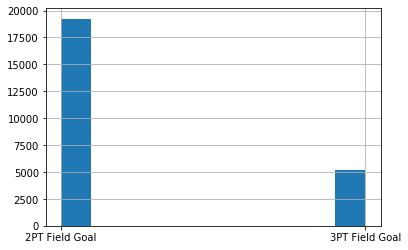

In [102]:
df.shot_type.hist()

In [103]:
# find correlations
find_corr('shot_type', df)

,Columns,Correlation,Abs_Correlation


### Assign majority group '2PT Field Goal' into the missing values

In [104]:
df['shot_type'] = df['shot_type'].replace(np.nan, '2PT Field Goal')

In [105]:
df.shot_type.isnull().sum()

0

### Covert shot_type to one hot vector

In [106]:
dum=pd.get_dummies(df['shot_type'],columns='shot_type',prefix='shot_type')
df=pd.concat([df, dum], axis=1)
df.drop(['shot_type'],axis=1,inplace= True)
df.columns

Index(['lat', 'loc_x', 'loc_y', 'lon', 'minutes_remaining', 'period',
       'playoffs', 'seconds_remaining', 'shot_distance', 'shot_made_flag',
       ...
       'season_2008.0', 'season_2009.0', 'season_2010.0', 'season_2011.0',
       'season_2012.0', 'season_2013.0', 'season_2014.0', 'season_2015.0',
       'shot_type_2PT Field Goal', 'shot_type_3PT Field Goal'],
      dtype='object', length=101)

In [107]:
for colname in df.columns:
    print('Missing value count of {} : {}'.format(colname, df[colname].isnull().sum()))

Missing value count of lat : 0
Missing value count of loc_x : 0
Missing value count of loc_y : 0
Missing value count of lon : 0
Missing value count of minutes_remaining : 0
Missing value count of period : 0
Missing value count of playoffs : 0
Missing value count of seconds_remaining : 0
Missing value count of shot_distance : 0
Missing value count of shot_made_flag : 0
Missing value count of shot_zone_area : 1327
Missing value count of shot_zone_basic : 1339
Missing value count of shot_zone_range : 1263
Missing value count of team_id : 1273
Missing value count of team_name : 1222
Missing value count of game_date : 1358
Missing value count of matchup : 1266
Missing value count of opponent : 0
Missing value count of shot_id : 1225
Missing value count of action_Alley Oop Dunk Shot : 0
Missing value count of action_Alley Oop Layup shot : 0
Missing value count of action_Cutting Layup Shot : 0
Missing value count of action_Driving Bank shot : 0
Missing value count of action_Driving Dunk Shot 

## 14. shot_zone_area

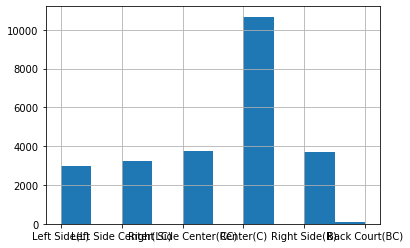

In [108]:
df.shot_zone_area.hist()

In [109]:
df.shot_zone_area.value_counts(dropna=False)

Center(C)                10670
Right Side Center(RC)     3759
Right Side(R)             3682
Left Side Center(LC)      3211
Left Side(L)              2981
NaN                       1327
Back Court(BC)              67
Name: shot_zone_area, dtype: int64

In [110]:
# find correlation
find_corr('shot_zone_area',df)

,Columns,Correlation,Abs_Correlation


In [111]:
# use categorical imputer to handle missing values

# 1. store the null values info. Therefore we can compare the imputating results.
null_sza_index = df[df['shot_zone_area'].isna()].index
null_sza_data = df[df['shot_zone_area'].isna()]
null_sza_data

,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag,...,season_2008.0,season_2009.0,season_2010.0,season_2011.0,season_2012.0,season_2013.0,season_2014.0,season_2015.0,shot_type_2PT Field Goal,shot_type_3PT Field Goal
6,34.0,0.000000,0.0,-118.2698,8.0,3.0,0.0,52.0,0.0,1.0,...,0,0,0,0,0,0,0,0,1,0
8,34.0,-65.000013,108.0,-118.3348,6.0,3.0,0.0,12.0,12.0,1.0,...,0,0,0,0,0,0,0,0,1,0
53,34.0,-189.000000,-4.0,-118.4588,10.0,1.0,0.0,4.0,18.0,0.0,...,0,0,0,0,0,0,0,0,1,0
74,34.0,167.000000,190.0,-118.1028,0.0,3.0,0.0,10.0,25.0,0.0,...,0,0,0,0,0,0,0,0,0,1
97,34.0,-193.000000,150.0,-118.4628,0.0,2.0,0.0,53.0,24.0,0.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30574,33.0,-3.000013,589.0,-118.2728,0.0,2.0,1.0,0.0,58.0,0.0,...,0,0,0,0,0,0,0,0,0,1
30591,34.0,-98.000000,261.0,-118.3678,1.0,1.0,1.0,22.0,27.0,0.0,...,0,0,0,0,0,0,0,0,0,1
30626,34.0,-6.000000,46.0,-118.2758,4.0,1.0,1.0,13.0,4.0,0.0,...,0,0,0,0,0,0,0,0,1,0
30656,34.0,-14.000000,1.0,-118.2838,9.0,2.0,1.0,13.0,1.0,0.0,...,0,0,0,0,0,0,0,0,1,0


In [112]:
# 2. replace missing values by imputation
from sklearn_pandas import CategoricalImputer
imputer = CategoricalImputer()
data = df['shot_zone_area']
imputer.fit_transform(data)
df.shot_zone_area= imputer.transform(df.shot_zone_area)

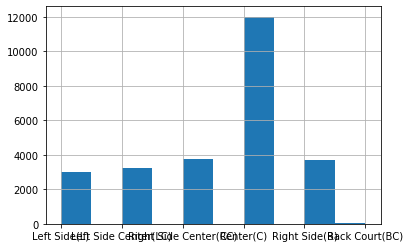

In [113]:
df.shot_zone_area.hist()

In [114]:
df.shot_zone_area.value_counts(dropna=False)

Center(C)                11997
Right Side Center(RC)     3759
Right Side(R)             3682
Left Side Center(LC)      3211
Left Side(L)              2981
Back Court(BC)              67
Name: shot_zone_area, dtype: int64

In [115]:
# covert shot_zone_area to one hot vector
dum=pd.get_dummies(df['shot_zone_area'],columns='shot_zone_area',prefix='shot_zone_area')
df=pd.concat([df, dum], axis=1)
df.drop(['shot_zone_area'],axis=1,inplace= True)
df.columns

Index(['lat', 'loc_x', 'loc_y', 'lon', 'minutes_remaining', 'period',
       'playoffs', 'seconds_remaining', 'shot_distance', 'shot_made_flag',
       ...
       'season_2014.0', 'season_2015.0', 'shot_type_2PT Field Goal',
       'shot_type_3PT Field Goal', 'shot_zone_area_Back Court(BC)',
       'shot_zone_area_Center(C)', 'shot_zone_area_Left Side Center(LC)',
       'shot_zone_area_Left Side(L)', 'shot_zone_area_Right Side Center(RC)',
       'shot_zone_area_Right Side(R)'],
      dtype='object', length=106)

In [116]:
for colname in df.columns:
    print('Missing value count of {} : {}'.format(colname, df[colname].isnull().sum()))

Missing value count of lat : 0
Missing value count of loc_x : 0
Missing value count of loc_y : 0
Missing value count of lon : 0
Missing value count of minutes_remaining : 0
Missing value count of period : 0
Missing value count of playoffs : 0
Missing value count of seconds_remaining : 0
Missing value count of shot_distance : 0
Missing value count of shot_made_flag : 0
Missing value count of shot_zone_basic : 1339
Missing value count of shot_zone_range : 1263
Missing value count of team_id : 1273
Missing value count of team_name : 1222
Missing value count of game_date : 1358
Missing value count of matchup : 1266
Missing value count of opponent : 0
Missing value count of shot_id : 1225
Missing value count of action_Alley Oop Dunk Shot : 0
Missing value count of action_Alley Oop Layup shot : 0
Missing value count of action_Cutting Layup Shot : 0
Missing value count of action_Driving Bank shot : 0
Missing value count of action_Driving Dunk Shot : 0
Missing value count of action_Driving Fin

## 15. shot_zone_basic

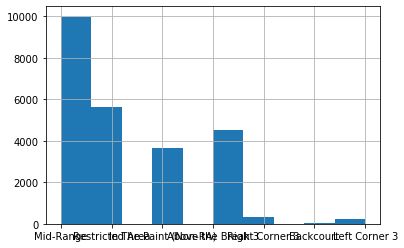

In [117]:
df.shot_zone_basic.hist()

In [118]:
df.shot_zone_basic.value_counts(dropna=False)

Mid-Range                9980
Restricted Area          5605
Above the Break 3        4503
In The Paint (Non-RA)    3660
NaN                      1339
Right Corner 3            321
Left Corner 3             233
Backcourt                  56
Name: shot_zone_basic, dtype: int64

In [119]:
# assign missing value to the majority gorup 'Mid-Range'
df.shot_zone_basic.replace(np.nan, 'Mid-Range', inplace=True)

In [120]:
df.shot_zone_basic.value_counts(dropna=False)

Mid-Range                11319
Restricted Area           5605
Above the Break 3         4503
In The Paint (Non-RA)     3660
Right Corner 3             321
Left Corner 3              233
Backcourt                   56
Name: shot_zone_basic, dtype: int64

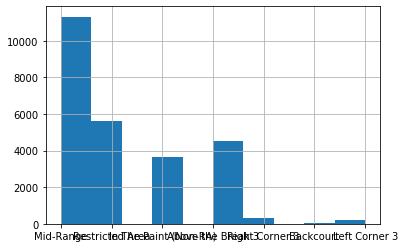

In [121]:
df.shot_zone_basic.hist()

In [122]:
# covert shot_zone_basic to one hot vector
dum=pd.get_dummies(df['shot_zone_basic'],columns='shot_zone_basic',prefix='shot_zone_basic')
df=pd.concat([df, dum], axis=1)
df.drop(['shot_zone_basic'],axis=1,inplace= True)
df.columns

Index(['lat', 'loc_x', 'loc_y', 'lon', 'minutes_remaining', 'period',
       'playoffs', 'seconds_remaining', 'shot_distance', 'shot_made_flag',
       ...
       'shot_zone_area_Left Side(L)', 'shot_zone_area_Right Side Center(RC)',
       'shot_zone_area_Right Side(R)', 'shot_zone_basic_Above the Break 3',
       'shot_zone_basic_Backcourt', 'shot_zone_basic_In The Paint (Non-RA)',
       'shot_zone_basic_Left Corner 3', 'shot_zone_basic_Mid-Range',
       'shot_zone_basic_Restricted Area', 'shot_zone_basic_Right Corner 3'],
      dtype='object', length=112)

In [123]:
for colname in df.columns:
    print('Missing value count of {} : {}'.format(colname, df[colname].isnull().sum()))

Missing value count of lat : 0
Missing value count of loc_x : 0
Missing value count of loc_y : 0
Missing value count of lon : 0
Missing value count of minutes_remaining : 0
Missing value count of period : 0
Missing value count of playoffs : 0
Missing value count of seconds_remaining : 0
Missing value count of shot_distance : 0
Missing value count of shot_made_flag : 0
Missing value count of shot_zone_range : 1263
Missing value count of team_id : 1273
Missing value count of team_name : 1222
Missing value count of game_date : 1358
Missing value count of matchup : 1266
Missing value count of opponent : 0
Missing value count of shot_id : 1225
Missing value count of action_Alley Oop Dunk Shot : 0
Missing value count of action_Alley Oop Layup shot : 0
Missing value count of action_Cutting Layup Shot : 0
Missing value count of action_Driving Bank shot : 0
Missing value count of action_Driving Dunk Shot : 0
Missing value count of action_Driving Finger Roll Layup Shot : 0
Missing value count of

## 16. shot_zone_range

In [124]:
df.shot_zone_range.value_counts(dropna=False)

Less Than 8 ft.    7442
16-24 ft.          6572
8-16 ft.           5314
24+ ft.            5039
NaN                1263
Back Court Shot      67
Name: shot_zone_range, dtype: int64

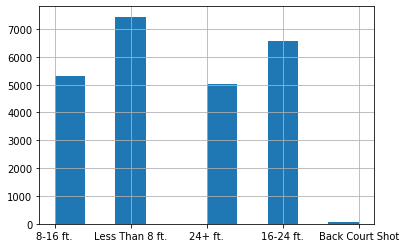

In [125]:
df.shot_zone_range.hist()

In [126]:
df.shot_zone_range = df.shot_zone_range.replace(np.nan, 'Less Than 8 ft.')

In [127]:
df.shot_zone_range.value_counts(dropna='False')

Less Than 8 ft.    8705
16-24 ft.          6572
8-16 ft.           5314
24+ ft.            5039
Back Court Shot      67
Name: shot_zone_range, dtype: int64

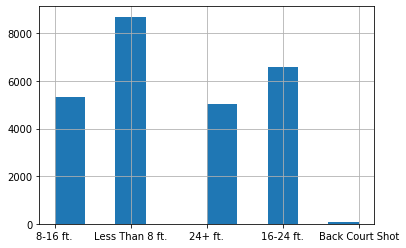

In [128]:
df.shot_zone_range.hist()

In [129]:
# covert shot_zone_range to one hot vector
dum=pd.get_dummies(df['shot_zone_range'],columns='shot_zone_range',prefix='shot_zone_range')
df=pd.concat([df, dum], axis=1)
df.drop(['shot_zone_range'],axis=1,inplace= True)
df.columns

Index(['lat', 'loc_x', 'loc_y', 'lon', 'minutes_remaining', 'period',
       'playoffs', 'seconds_remaining', 'shot_distance', 'shot_made_flag',
       ...
       'shot_zone_basic_In The Paint (Non-RA)',
       'shot_zone_basic_Left Corner 3', 'shot_zone_basic_Mid-Range',
       'shot_zone_basic_Restricted Area', 'shot_zone_basic_Right Corner 3',
       'shot_zone_range_16-24 ft.', 'shot_zone_range_24+ ft.',
       'shot_zone_range_8-16 ft.', 'shot_zone_range_Back Court Shot',
       'shot_zone_range_Less Than 8 ft.'],
      dtype='object', length=116)

In [130]:
for colname in df.columns:
    print('Missing value count of {} : {}'.format(colname, df[colname].isnull().sum()))

Missing value count of lat : 0
Missing value count of loc_x : 0
Missing value count of loc_y : 0
Missing value count of lon : 0
Missing value count of minutes_remaining : 0
Missing value count of period : 0
Missing value count of playoffs : 0
Missing value count of seconds_remaining : 0
Missing value count of shot_distance : 0
Missing value count of shot_made_flag : 0
Missing value count of team_id : 1273
Missing value count of team_name : 1222
Missing value count of game_date : 1358
Missing value count of matchup : 1266
Missing value count of opponent : 0
Missing value count of shot_id : 1225
Missing value count of action_Alley Oop Dunk Shot : 0
Missing value count of action_Alley Oop Layup shot : 0
Missing value count of action_Cutting Layup Shot : 0
Missing value count of action_Driving Bank shot : 0
Missing value count of action_Driving Dunk Shot : 0
Missing value count of action_Driving Finger Roll Layup Shot : 0
Missing value count of action_Driving Finger Roll Shot : 0
Missing v

## 17. team_id, team_name, game_date, matchup, shot_id

I will drop those columns since I all of them can be described by other columns 

However, before I drop those columns, I will check the values and distribution.

#### team_id

In [131]:
df.team_id.value_counts(dropna=False)

1.610613e+09    24424
NaN              1273
Name: team_id, dtype: int64

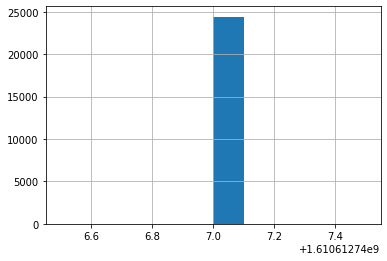

In [132]:
df.team_id.hist()

#### team_name

In [133]:
df.team_name.value_counts(dropna=False)

Los Angeles Lakers    24475
NaN                    1222
Name: team_name, dtype: int64

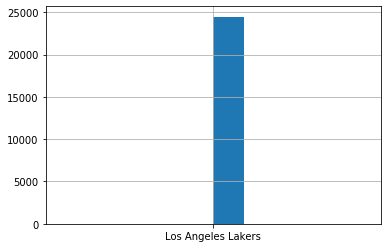

In [134]:
df.team_name.hist()

#### game_date

In [135]:
df.game_date.value_counts(dropna=False)

NaN           1358
2007-03-30      39
2006-01-22      39
2016-04-13      39
2002-11-07      37
              ... 
1996-11-29       1
1997-04-25       1
1998-03-16       1
1997-02-21       1
2005-01-13       1
Name: game_date, Length: 1559, dtype: int64

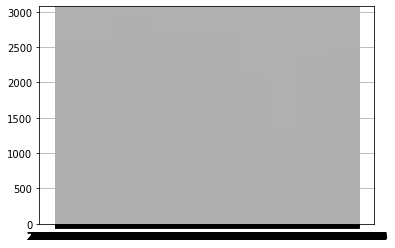

In [136]:
df.game_date.hist()

#### matchup

In [137]:
df.matchup.value_counts(dropna=False) # can be described by opponent

NaN            1266
LAL @ SAS       804
LAL vs. SAS     731
LAL @ SAC       725
LAL @ PHX       708
               ... 
LAL @ PHO        28
LAL vs. NOP      20
LAL vs. SAN      20
LAL @ UTH        15
LAL vs. BKN      13
Name: matchup, Length: 75, dtype: int64

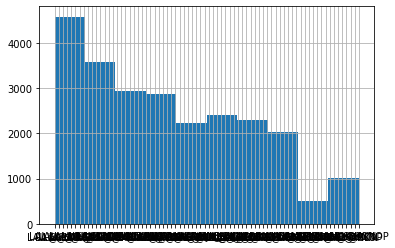

In [138]:
df.matchup.hist()

#### shot_id

In [139]:
df.shot_id.value_counts(dropna=False)

NaN        1225
21789.0       1
26652.0       1
30344.0       1
24608.0       1
           ... 
25033.0       1
20942.0       1
18819.0       1
25451.0       1
2.0           1
Name: shot_id, Length: 24473, dtype: int64

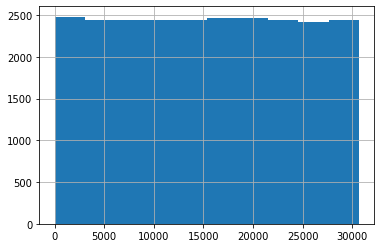

In [140]:
df.shot_id.hist()

### Drop column from dataframe

In [141]:
drop_columns = ['team_id', 'team_name', 'game_date', 'matchup', 'shot_id']
df = df.drop(columns=drop_columns)

## 18. Opponent

In [142]:
# covert opponent to one hot vector
dum=pd.get_dummies(df['opponent'],columns='opponent',prefix='opponent')
df=pd.concat([df, dum], axis=1)
df.drop(['opponent'],axis=1,inplace= True)
df.columns

Index(['lat', 'loc_x', 'loc_y', 'lon', 'minutes_remaining', 'period',
       'playoffs', 'seconds_remaining', 'shot_distance', 'shot_made_flag',
       ...
       'opponent_PHI', 'opponent_PHX', 'opponent_POR', 'opponent_SAC',
       'opponent_SAS', 'opponent_SEA', 'opponent_TOR', 'opponent_UTA',
       'opponent_VAN', 'opponent_WAS'],
      dtype='object', length=143)

In [143]:
for colname in df.columns:
    print('Missing value count of {} : {}'.format(colname, df[colname].isnull().sum()))

Missing value count of lat : 0
Missing value count of loc_x : 0
Missing value count of loc_y : 0
Missing value count of lon : 0
Missing value count of minutes_remaining : 0
Missing value count of period : 0
Missing value count of playoffs : 0
Missing value count of seconds_remaining : 0
Missing value count of shot_distance : 0
Missing value count of shot_made_flag : 0
Missing value count of action_Alley Oop Dunk Shot : 0
Missing value count of action_Alley Oop Layup shot : 0
Missing value count of action_Cutting Layup Shot : 0
Missing value count of action_Driving Bank shot : 0
Missing value count of action_Driving Dunk Shot : 0
Missing value count of action_Driving Finger Roll Layup Shot : 0
Missing value count of action_Driving Finger Roll Shot : 0
Missing value count of action_Driving Floating Bank Jump Shot : 0
Missing value count of action_Driving Floating Jump Shot : 0
Missing value count of action_Driving Hook Shot : 0
Missing value count of action_Driving Jump shot : 0
Missing 

In [144]:
df.columns.nunique()

143

Now, I finished handling missing values. There are 144 columns in my dataframe.\
Next step, spliting and scaling dataframe!

## Spliting dataframe

dataframe shape: (25697, 144)\
X's number : 143\
y's number : 1

In [145]:
X = df.drop('shot_made_flag', axis = 1) 
y = df.shot_made_flag

In [146]:
from sklearn.model_selection import train_test_split

X_train_org, X_test_org, y_train, y_test = train_test_split(X,y, test_size=0.2)

## Scaling dataframe

Scaling method -> MinMaxScaler( )\
Because I don't want to change the distribution of the dataset.

In [147]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25697 entries, 1 to 30696
Data columns (total 143 columns):
 #   Column                                  Dtype  
---  ------                                  -----  
 0   lat                                     float64
 1   loc_x                                   float64
 2   loc_y                                   float64
 3   lon                                     float64
 4   minutes_remaining                       float64
 5   period                                  float64
 6   playoffs                                float64
 7   seconds_remaining                       float64
 8   shot_distance                           float64
 9   shot_made_flag                          float64
 10  action_Alley Oop Dunk Shot              uint8  
 11  action_Alley Oop Layup shot             uint8  
 12  action_Cutting Layup Shot               uint8  
 13  action_Driving Bank shot                uint8  
 14  action_Driving Dunk Shot             

### The columns need to scale is #0. lat ~ #8. shot_distance , float data type's columns

In [148]:
from sklearn.preprocessing import MinMaxScaler

# scale the dataset
# 1. instantiate the scalar
# 2. fit the scalar
# 3. transform
scaler = MinMaxScaler()
scaler.fit(X_train_org)
X_train = scaler.transform(X_train_org)
X_test = scaler.transform(X_test_org)

### Creat dataframe for train_x and test_x. (easy to read)

In [149]:
X_train_df = pd.DataFrame(X_train, columns = X.columns) #data type array -> dataframe
X_train_df.head()

,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,action_Alley Oop Dunk Shot,...,opponent_PHI,opponent_PHX,opponent_POR,opponent_SAC,opponent_SAS,opponent_SEA,opponent_TOR,opponent_UTA,opponent_VAN,opponent_WAS
0,1.0,0.502008,0.052695,0.502008,1.000000,0.166667,0.0,0.101695,0.069644,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.502008,0.052695,0.502008,0.909091,0.333333,0.0,0.457627,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.502008,0.052695,0.502008,0.818182,0.000000,0.0,0.576271,0.000000,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.502008,0.052695,0.502008,0.272727,0.166667,0.0,0.983051,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.044177,0.052695,0.044177,0.909091,0.166667,0.0,0.186441,0.278481,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [150]:
X_test_df = pd.DataFrame(X_test, columns = X.columns) #data type array -> dataframe
X_test_df.head()

,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,action_Alley Oop Dunk Shot,...,opponent_PHI,opponent_PHX,opponent_POR,opponent_SAC,opponent_SAS,opponent_SEA,opponent_TOR,opponent_UTA,opponent_VAN,opponent_WAS
0,1.0,0.305221,0.099401,0.305221,0.181818,0.500000,1.0,0.457627,0.126582,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.279116,0.102994,0.279116,0.454545,0.333333,0.0,0.983051,0.139241,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.630522,0.154491,0.630522,0.909091,0.166667,0.0,0.813559,0.126582,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.502008,0.052695,0.502009,0.909091,0.500000,0.0,0.966102,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.295181,0.235928,0.295181,0.818182,0.000000,0.0,0.525424,0.227848,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


After we finished the tough part, let's dive into the fun part - Modeling!

# Modeling - Classification
In this project, I will run
1. KNN classification
2. Logistic Regression
3. Linear Support Vector Machine
4. Kernelized Support Vector Machine (RBF, poly, and linear)
5. Decision Tree.

and find out which model is the best fit for this dataset. (criteria: processing time and accuracy)

## 1. KNN classification

In [151]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# below libraries are for model performance
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score

In [152]:
knn_param_grid = {'n_neighbors': np.arange(1, 5),
              'weights': ['uniform','distance']}
knn_grid_search = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=5, 
                               return_train_score=True, scoring = 'roc_auc')
knn_grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(knn_grid_search.best_params_))
print("Best cross-validation score: {:.4f}".format(knn_grid_search.best_score_))

knn_result = pd.DataFrame(knn_grid_search.cv_results_)

Best parameters: {'n_neighbors': 4, 'weights': 'uniform'}
Best cross-validation score: 0.6172


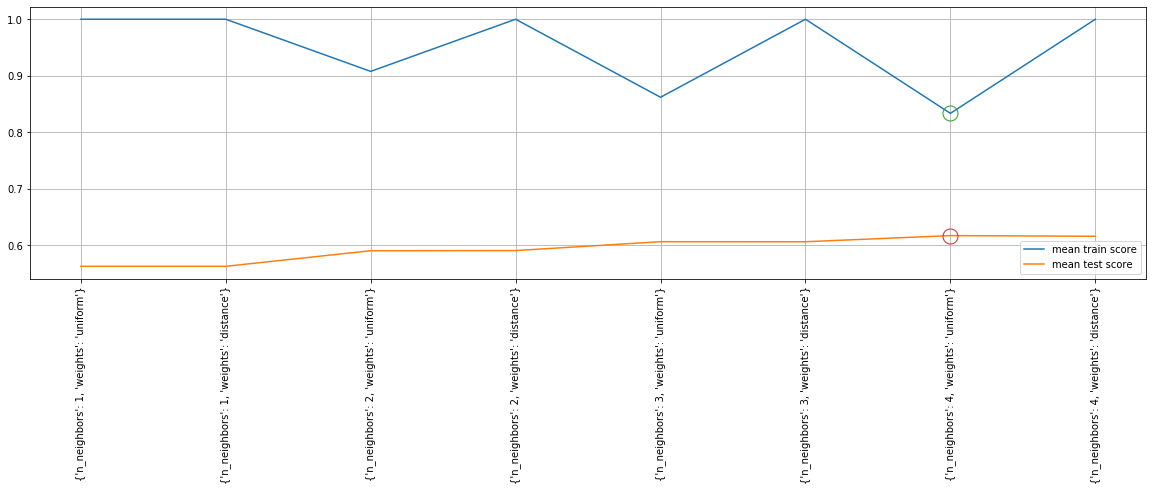

In [153]:
%matplotlib inline

plt.subplots(figsize = (20,5))
plt.plot(range(knn_result['params'].shape[0]), knn_result['mean_train_score'], label = 'mean train score')
plt.plot(range(knn_result['params'].shape[0]), knn_result['mean_test_score'], label = 'mean test score')
plt.xticks(range(knn_result['params'].shape[0]), knn_result['params'], rotation = 90)
plt.plot([knn_grid_search.best_index_], knn_result['mean_train_score'][knn_grid_search.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.plot([knn_grid_search.best_index_], knn_result['mean_test_score'][knn_grid_search.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.legend()
plt.grid()

In [154]:
%%time
knn_pred = knn_grid_search.predict(X_test)
print(confusion_matrix(y_test, knn_pred))
print(classification_report(y_test, knn_pred, digits = 4))
print("roc_auc_score: {:.4f}".format(roc_auc_score(y_test, knn_pred)))
knn_roc_auc_score = roc_auc_score(y_test, knn_pred)

[[2366  453]
 [1514  807]]
              precision    recall  f1-score   support

         0.0     0.6098    0.8393    0.7064      2819
         1.0     0.6405    0.3477    0.4507      2321

    accuracy                         0.6173      5140
   macro avg     0.6251    0.5935    0.5785      5140
weighted avg     0.6236    0.6173    0.5909      5140

roc_auc_score: 0.5935
CPU times: user 22.3 s, sys: 94.1 ms, total: 22.4 s
Wall time: 22.6 s


## 2. Logistic Regression

In [155]:
from sklearn.linear_model import LogisticRegression

In [156]:
log_param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
log_grid_search = GridSearchCV(LogisticRegression(random_state = 0, solver = 'lbfgs'), log_param_grid, cv=5, return_train_score=True, scoring = 'roc_auc')
log_grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(log_grid_search.best_params_))
print("Best cross-validation score: {:.4f}".format(log_grid_search.best_score_))

log_result = pd.DataFrame(log_grid_search.cv_results_)

/Users/shih-tien/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/shih-tien/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/shih-tien/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/shih-tien/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/shih-tien/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: l

Best parameters: {'C': 1}
Best cross-validation score: 0.6859


/Users/shih-tien/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


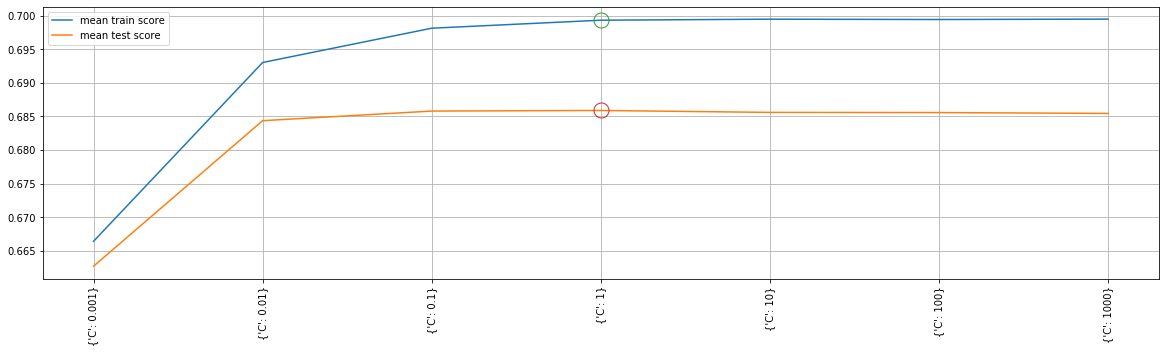

In [157]:
%matplotlib inline

plt.subplots(figsize = (20,5))
plt.plot(range(log_result['params'].shape[0]), log_result['mean_train_score'], label = 'mean train score')
plt.plot(range(log_result['params'].shape[0]), log_result['mean_test_score'], label = 'mean test score')
plt.xticks(range(log_result['params'].shape[0]), log_result['params'], rotation = 90)
plt.plot([log_grid_search.best_index_], log_result['mean_train_score'][log_grid_search.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.plot([log_grid_search.best_index_], log_result['mean_test_score'][log_grid_search.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.legend()
plt.grid()

In [158]:
%%time
log_pred = log_grid_search.predict(X_test)
print(confusion_matrix(y_test, log_pred))
print(classification_report(y_test, log_pred, digits = 4))
print("roc_auc_score: {:.4f}".format(roc_auc_score(y_test, log_pred)))
log_roc_auc_score = roc_auc_score(y_test, log_pred)

[[2433  386]
 [1290 1031]]
              precision    recall  f1-score   support

         0.0     0.6535    0.8631    0.7438      2819
         1.0     0.7276    0.4442    0.5516      2321

    accuracy                         0.6739      5140
   macro avg     0.6905    0.6536    0.6477      5140
weighted avg     0.6870    0.6739    0.6570      5140

roc_auc_score: 0.6536
CPU times: user 35.7 ms, sys: 4.08 ms, total: 39.8 ms
Wall time: 22.4 ms


## 3. Linear Support Vector Machine 

In [159]:
from sklearn.svm import LinearSVC

In [160]:
lsvc_param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
lsvc_grid_search = GridSearchCV(LinearSVC(random_state = 0, max_iter = 10000), lsvc_param_grid, cv=5, return_train_score=True, scoring = 'roc_auc')
lsvc_grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(lsvc_grid_search.best_params_))
print("Best cross-validation score: {:.4f}".format(lsvc_grid_search.best_score_))

lsvc_result = pd.DataFrame(lsvc_grid_search.cv_results_)

/Users/shih-tien/Library/Python/3.7/lib/python/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/shih-tien/Library/Python/3.7/lib/python/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/shih-tien/Library/Python/3.7/lib/python/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/shih-tien/Library/Python/3.7/lib/python/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/shih-tien/Library/Python/3.7/lib/python/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblin

Best parameters: {'C': 0.01}
Best cross-validation score: 0.6858


/Users/shih-tien/Library/Python/3.7/lib/python/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


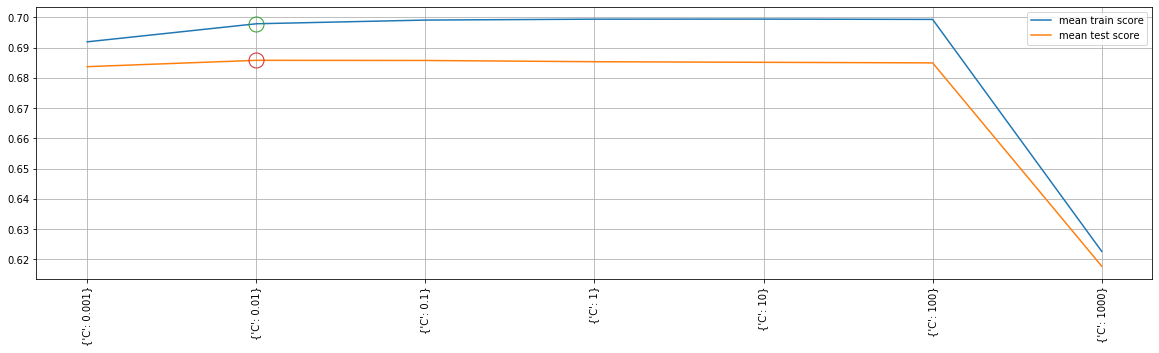

In [161]:
%matplotlib inline

plt.subplots(figsize = (20,5))
plt.plot(range(lsvc_result['params'].shape[0]), lsvc_result['mean_train_score'], label = 'mean train score')
plt.plot(range(lsvc_result['params'].shape[0]), lsvc_result['mean_test_score'], label = 'mean test score')
plt.xticks(range(lsvc_result['params'].shape[0]), lsvc_result['params'], rotation = 90)
plt.plot([lsvc_grid_search.best_index_], lsvc_result['mean_train_score'][lsvc_grid_search.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.plot([lsvc_grid_search.best_index_], lsvc_result['mean_test_score'][lsvc_grid_search.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.legend()
plt.grid()

In [162]:
%%time
lsvc_pred = lsvc_grid_search.predict(X_test)
print(confusion_matrix(y_test, lsvc_pred))
print(classification_report(y_test, lsvc_pred, digits = 4))
print("roc_auc_score: {:.4f}".format(roc_auc_score(y_test, lsvc_pred)))
lsvc_roc_auc_score = roc_auc_score(y_test, lsvc_pred)

[[2428  391]
 [1287 1034]]
              precision    recall  f1-score   support

         0.0     0.6536    0.8613    0.7432      2819
         1.0     0.7256    0.4455    0.5521      2321

    accuracy                         0.6735      5140
   macro avg     0.6896    0.6534    0.6476      5140
weighted avg     0.6861    0.6735    0.6569      5140

roc_auc_score: 0.6534
CPU times: user 32 ms, sys: 2.13 ms, total: 34.1 ms
Wall time: 42.7 ms


## 4. Kerenilzed Support Vector Machine (rbf, poly, and linear)

In [163]:
from sklearn.svm import SVC

In [164]:
svc_param_grid = [{'kernel': ['rbf'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100], 
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
                  {'kernel': ['poly'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100]},
                  {'kernel': ['linear'],
               'degree': np.arange(1, 11)}
             ]
svc_grid_search = GridSearchCV(SVC(random_state = 0), svc_param_grid, cv=5, return_train_score=True, scoring = 'roc_auc')
svc_grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(svc_grid_search.best_params_))
print("Best cross-validation score: {:.4f}".format(svc_grid_search.best_score_))


svc_result = pd.DataFrame(svc_grid_search.cv_results_)

/Users/shih-tien/Library/Python/3.7/lib/python/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/shih-tien/Library/Python/3.7/lib/python/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/shih-tien/Library/Python/3.7/lib/python/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/shih-tien/Library/

/Users/shih-tien/Library/Python/3.7/lib/python/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/shih-tien/Library/Python/3.7/lib/python/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/shih-tien/Library/Python/3.7/lib/python/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/shih-tien/Library/

Best parameters: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
Best cross-validation score: 0.6807


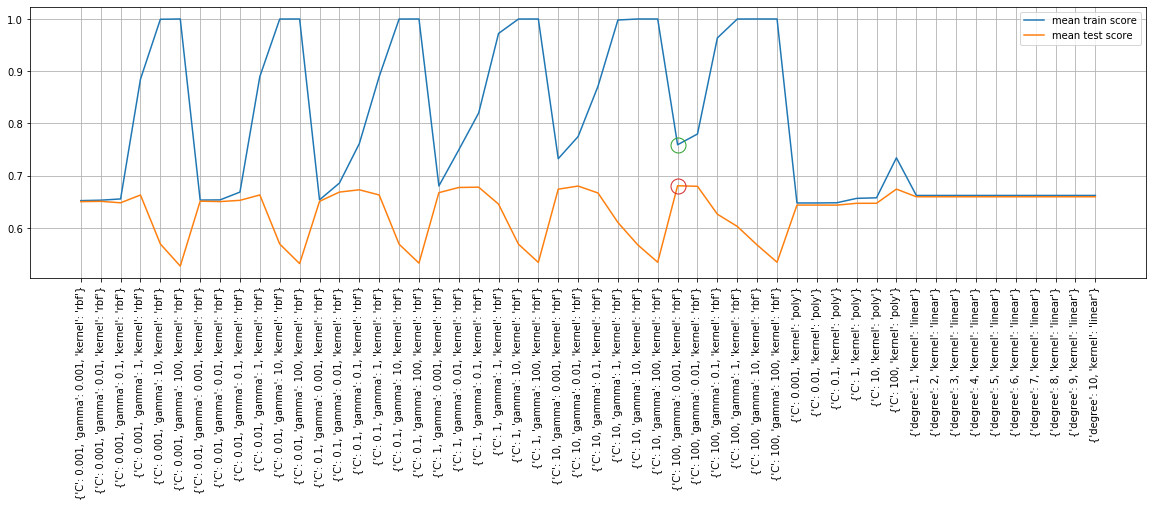

In [165]:
%matplotlib inline

plt.subplots(figsize = (20,5))
plt.plot(range(svc_result['params'].shape[0]), svc_result['mean_train_score'], label = 'mean train score')
plt.plot(range(svc_result['params'].shape[0]), svc_result['mean_test_score'], label = 'mean test score')
plt.xticks(range(svc_result['params'].shape[0]), svc_result['params'], rotation = 90)
plt.plot([svc_grid_search.best_index_], svc_result['mean_train_score'][svc_grid_search.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.plot([svc_grid_search.best_index_], svc_result['mean_test_score'][svc_grid_search.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.legend()
plt.grid()

In [166]:
%%time
svc_pred = svc_grid_search.predict(X_test)
print(confusion_matrix(y_test, svc_pred))
print(classification_report(y_test, svc_pred, digits = 4))
print("roc_auc_score: {:.4f}".format(roc_auc_score(y_test, svc_pred)))
svc_roc_auc_score = roc_auc_score(y_test, svc_pred)

[[2425  394]
 [1297 1024]]
              precision    recall  f1-score   support

         0.0     0.6515    0.8602    0.7415      2819
         1.0     0.7221    0.4412    0.5477      2321

    accuracy                         0.6710      5140
   macro avg     0.6868    0.6507    0.6446      5140
weighted avg     0.6834    0.6710    0.6540      5140

roc_auc_score: 0.6507
CPU times: user 13 s, sys: 50.2 ms, total: 13 s
Wall time: 13.2 s


## 5. Decision Tree

In [167]:
from sklearn.tree import DecisionTreeClassifier

In [168]:
tree_param_grid = {'max_depth': np.arange(1, 11), 
                   'criterion': ['gini','entropy']
                  }
tree_grid_search = GridSearchCV(DecisionTreeClassifier(random_state = 0), tree_param_grid, cv=5, return_train_score=True, scoring = 'roc_auc')
tree_grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(tree_grid_search.best_params_))
print("Best cross-validation score: {:.4f}".format(tree_grid_search.best_score_))

tree_result = pd.DataFrame(tree_grid_search.cv_results_)

Best parameters: {'criterion': 'entropy', 'max_depth': 6}
Best cross-validation score: 0.6808


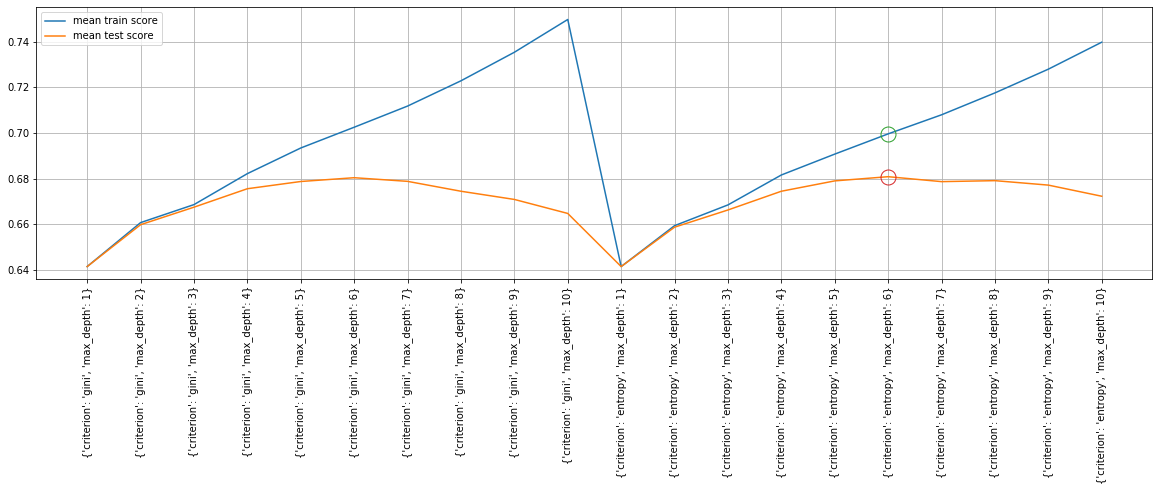

In [169]:
%matplotlib inline

plt.subplots(figsize = (20,5))
plt.plot(range(tree_result['params'].shape[0]), tree_result['mean_train_score'], label = 'mean train score')
plt.plot(range(tree_result['params'].shape[0]), tree_result['mean_test_score'], label = 'mean test score')
plt.xticks(range(tree_result['params'].shape[0]), tree_result['params'], rotation = 90)
plt.plot([tree_grid_search.best_index_], tree_result['mean_train_score'][tree_grid_search.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.plot([tree_grid_search.best_index_], tree_result['mean_test_score'][tree_grid_search.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.legend()
plt.grid()

In [170]:
%%time
tree_pred = tree_grid_search.predict(X_test)
print(confusion_matrix(y_test, tree_pred))
print(classification_report(y_test, tree_pred, digits = 4))
print("roc_auc_score: {:.4f}".format(roc_auc_score(y_test, tree_pred)))
tree_roc_auc_score = roc_auc_score(y_test, tree_pred)

[[2367  452]
 [1243 1078]]
              precision    recall  f1-score   support

         0.0     0.6557    0.8397    0.7364      2819
         1.0     0.7046    0.4645    0.5599      2321

    accuracy                         0.6702      5140
   macro avg     0.6801    0.6521    0.6481      5140
weighted avg     0.6778    0.6702    0.6567      5140

roc_auc_score: 0.6521
CPU times: user 22.8 ms, sys: 2.81 ms, total: 25.6 ms
Wall time: 24.6 ms


## Model Performances

I will show both 
1. Precision recall curves
2. ROC curves

## 1. KNN classification

#### * Precision recall curves

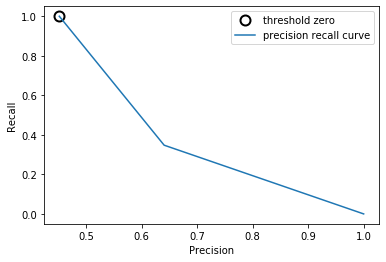

In [171]:
%matplotlib inline

precision, recall, thresholds = precision_recall_curve(y_test, knn_pred)

close_zero = np.argmin(np.abs(thresholds))

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

#### * ROC curves

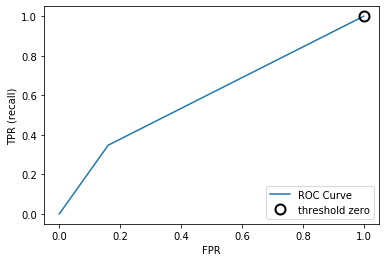

In [172]:
%matplotlib inline 

fpr, tpr, thresholds = roc_curve(y_test, knn_pred)

plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

## 2. Logistic Regression

#### * Precision recall curves

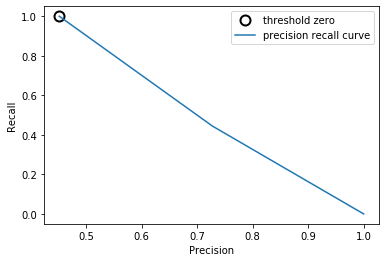

In [173]:
%matplotlib inline

precision, recall, thresholds = precision_recall_curve(y_test, log_pred)

close_zero = np.argmin(np.abs(thresholds))

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

#### * ROC curves

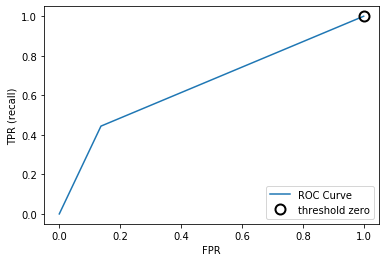

In [174]:
%matplotlib inline 

fpr, tpr, thresholds = roc_curve(y_test, log_pred)

plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

## 3. Linear Support Vector Machine

#### * Precision recall curves

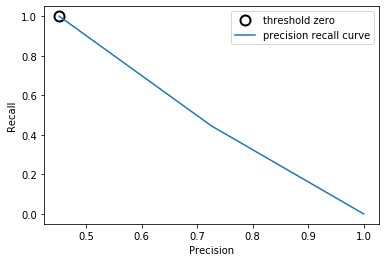

In [175]:
%matplotlib inline

precision, recall, thresholds = precision_recall_curve(y_test, lsvc_pred)

close_zero = np.argmin(np.abs(thresholds))

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

#### * ROC curves

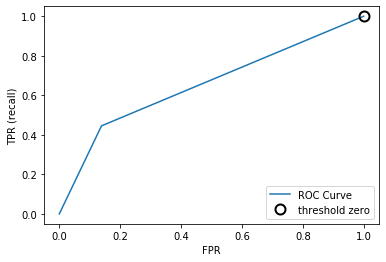

In [176]:
%matplotlib inline 

fpr, tpr, thresholds = roc_curve(y_test, lsvc_pred)

plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

## 4. Kernelized Support Vector Machine (rbf, poly, and linear)

#### * Precision recall curves

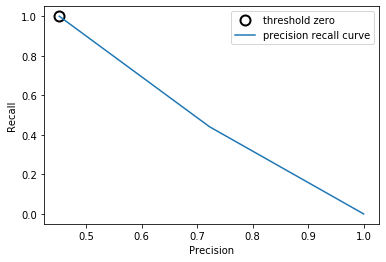

In [177]:
%matplotlib inline

precision, recall, thresholds = precision_recall_curve(y_test, svc_pred)

close_zero = np.argmin(np.abs(thresholds))

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

#### * ROC curves

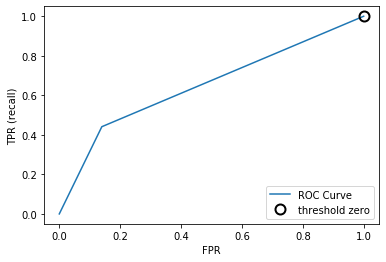

In [178]:
%matplotlib inline 

fpr, tpr, thresholds = roc_curve(y_test, svc_pred)

plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

## 5. Decision Tree

#### * Precision recall curves

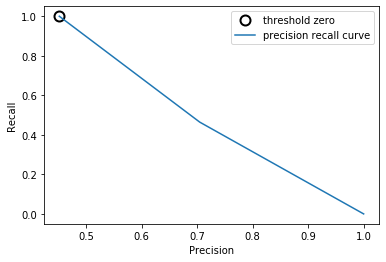

In [179]:
%matplotlib inline

precision, recall, thresholds = precision_recall_curve(y_test, tree_pred)

close_zero = np.argmin(np.abs(thresholds))

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

#### * ROC curves

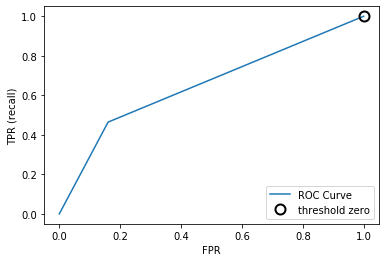

In [180]:
%matplotlib inline 

fpr, tpr, thresholds = roc_curve(y_test, tree_pred)

plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

## Model Performance Metrics

In [182]:
model_performance_metrics = pd.DataFrame({"Model": ['KNN classification', 'Logistic Regression', 'Linear Support Vector Machine', 'Kerenilzed Support Vector Machine', 'Decision Tree'],
                                          "Cross-validation Score": [knn_grid_search.best_score_, log_grid_search.best_score_, lsvc_grid_search.best_score_, svc_grid_search.best_score_, tree_grid_search.best_score_],
                                          "Roc_Auc_Score": [knn_roc_auc_score, log_roc_auc_score, lsvc_roc_auc_score, svc_roc_auc_score, tree_roc_auc_score],
                                         })

In [183]:
model_performance_metrics

,Model,Cross-validation Score,Roc_Auc_Score
0,KNN classification,0.617161,0.593500
1,Logistic Regression,0.685879,0.653639
2,Linear Support Vector Machine,0.685779,0.653398
3,Kerenilzed Support Vector Machine,0.680723,0.650712
4,Decision Tree,0.680844,0.652057


## Conclusion

Based on the final roc auc score, performance of all models are similar, and Logistic Regression has the highest score.